In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sympy import cos, sin, exp, Matrix, sqrt
from sympy.simplify.fu import TR10, TR9
from sympy import evaluate
import pandas as pd

from IPython.display import display, Math
from IPython.display import display as disp
from utils import symdisp, symplot
import ipywidgets as widgets
from ipywidgets import interact

from optic.comm.modulation import modulateGray, demodulateGray, grayMapping
from optic.dsp.core import firFilter, pulseShape, lowPassFIR, pnorm, upsample
from optic.comm.metrics import signal_power
from optic.plot import eyediagram
from optic.utils import parameters

In [2]:
from IPython.core.display import HTML
from IPython.core.pylabtools import figsize

HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [3]:
figsize(10, 3)
mpl.rcParams['agg.path.chunksize'] = 10000

# Optical communications

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lasers" data-toc-modified-id="Lasers-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Lasers</a></span><ul class="toc-item"><li><span><a href="#Estrutura-física-de-um-laser" data-toc-modified-id="Estrutura-física-de-um-laser-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Estrutura física de um laser</a></span></li><li><span><a href="#Coerência-em-lasers-reais" data-toc-modified-id="Coerência-em-lasers-reais-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Coerência em lasers reais</a></span></li></ul></li><li><span><a href="#Representações-para-a-portadora-óptica" data-toc-modified-id="Representações-para-a-portadora-óptica-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Representações para a portadora óptica</a></span><ul class="toc-item"><li><span><a href="#Modulações-digitais" data-toc-modified-id="Modulações-digitais-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Modulações digitais</a></span></li><li><span><a href="#Diagramas-de-constelação" data-toc-modified-id="Diagramas-de-constelação-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Diagramas de constelação</a></span></li></ul></li><li><span><a href="#Modulador-de-Mach-Zehnder" data-toc-modified-id="Modulador-de-Mach-Zehnder-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modulador de Mach-Zehnder</a></span><ul class="toc-item"><li><span><a href="#Transmitindo-informação-na-intensidade-(potência)-da-portadora-óptica-($V_b-=-\pm-V_π/2$)" data-toc-modified-id="Transmitindo-informação-na-intensidade-(potência)-da-portadora-óptica-($V_b-=-\pm-V_π/2$)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Transmitindo informação na intensidade (potência) da portadora óptica ($V_b = \pm V_π/2$)</a></span></li><li><span><a href="#Transmitindo-informação-na-amplitude-do-campo-elétrico-($V_b-=-\pm-V_π$)" data-toc-modified-id="Transmitindo-informação-na-amplitude-do-campo-elétrico-($V_b-=-\pm-V_π$)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Transmitindo informação na amplitude do campo elétrico ($V_b = \pm V_π$)</a></span></li><li><span><a href="#Razão-de-extinção" data-toc-modified-id="Razão-de-extinção-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Razão de extinção</a></span></li></ul></li><li><span><a href="#Intervalos-de-sinalização" data-toc-modified-id="Intervalos-de-sinalização-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Intervalos de sinalização</a></span><ul class="toc-item"><li><span><a href="#Teorema-da-amostragem" data-toc-modified-id="Teorema-da-amostragem-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Teorema da amostragem</a></span></li><li><span><a href="#Exemplo-1:-função-sinc(t)" data-toc-modified-id="Exemplo-1:-função-sinc(t)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Exemplo 1: função sinc(t)</a></span></li><li><span><a href="#Exemplo-2:-chirp-de-frequência-linear" data-toc-modified-id="Exemplo-2:-chirp-de-frequência-linear-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Exemplo 2: chirp de frequência linear</a></span></li></ul></li><li><span><a href="#Modulação-de-amplitude-OOK" data-toc-modified-id="Modulação-de-amplitude-OOK-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Modulação de amplitude OOK</a></span><ul class="toc-item"><li><span><a href="#Gerando-sinais-binários-OOK" data-toc-modified-id="Gerando-sinais-binários-OOK-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Gerando sinais binários OOK</a></span><ul class="toc-item"><li><span><a href="#Pulso-retangular-ideal" data-toc-modified-id="Pulso-retangular-ideal-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Pulso retangular ideal</a></span></li><li><span><a href="#Pulso-NRZ-típico" data-toc-modified-id="Pulso-NRZ-típico-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Pulso NRZ típico</a></span></li><li><span><a href="#Pulso-cosseno-levantado" data-toc-modified-id="Pulso-cosseno-levantado-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Pulso cosseno levantado</a></span></li></ul></li></ul></li><li><span><a href="#Densidade-espectral-de-potência-de-sinais-modulados-digitalmenente" data-toc-modified-id="Densidade-espectral-de-potência-de-sinais-modulados-digitalmenente-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Densidade espectral de potência de sinais modulados digitalmenente</a></span><ul class="toc-item"><li><span><a href="#Valor-médio-e-autocorrelação-de-$V(t)$" data-toc-modified-id="Valor-médio-e-autocorrelação-de-$V(t)$-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Valor médio e autocorrelação de $V(t)$</a></span><ul class="toc-item"><li><span><a href="#Valor-médio" data-toc-modified-id="Valor-médio-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Valor médio</a></span></li><li><span><a href="#Autocorrelação" data-toc-modified-id="Autocorrelação-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>Autocorrelação</a></span></li></ul></li><li><span><a href="#Densidade-espectral-de-potência-$\mathcal{S}_{V}(f)$" data-toc-modified-id="Densidade-espectral-de-potência-$\mathcal{S}_{V}(f)$-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Densidade espectral de potência $\mathcal{S}_{V}(f)$</a></span></li><li><span><a href="#Exemplos-de-densidade-espectral-de-potência-de-sinais-modulados" data-toc-modified-id="Exemplos-de-densidade-espectral-de-potência-de-sinais-modulados-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Exemplos de densidade espectral de potência de sinais modulados</a></span></li></ul></li><li><span><a href="#Gerando-sinais-M-PAM" data-toc-modified-id="Gerando-sinais-M-PAM-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Gerando sinais M-PAM</a></span></li><li><span><a href="#Gerando-sinais-modulados-em-fase-e-quadratura-(PSK,-QAM)" data-toc-modified-id="Gerando-sinais-modulados-em-fase-e-quadratura-(PSK,-QAM)-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Gerando sinais modulados em fase e quadratura (PSK, QAM)</a></span></li><li><span><a href="#Formatação--de-pulso-óptica:-pulsos-retorno-ao-zero-(RZ)" data-toc-modified-id="Formatação--de-pulso-óptica:-pulsos-retorno-ao-zero-(RZ)-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Formatação  de pulso óptica: pulsos retorno-ao-zero (RZ)</a></span></li><li><span><a href="#Pente-de-frequências-(frequency-comb)" data-toc-modified-id="Pente-de-frequências-(frequency-comb)-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Pente de frequências (frequency comb)</a></span></li><li><span><a href="#Referências" data-toc-modified-id="Referências-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Referências</a></span></li></ul></div>

# Geração de signals optical

Num system de communication digital optical, a function do transmitter é converter uma dada sequência de bits num trem de pulsos elétricos que, por sua vez, será utilizado na modulation de uma portadora optical (laser). A modulation de portadoras optical é realizada por meio de devices de conversão eletro-optical.

<img src="./figuras/Tx_OOK.png" width="500">

Diversas techniques de modulation podem ser implementadas e diversos fatores podem influenciar o projeto de um optical transmitter. 

## Lasers

Um laser (*Light Amplification by Stimulated Emission of Radiation*) é um device capaz de emitir luz de maneira coherent. 

Um device laser ideal produz um radiação eletromagnética colimada (viaja em paralelo com uma direção única) com frequency e phase bem definidas, ou seja, a luz gerada por um laser é altamente direcional, monocromática (de uma única *cor* ou wavelength) e podendo alcançar altas intensities.


### Structure física de um laser

Um laser geralmente é composto por três partes principais:

**Meio ativo (material laser):** Esse é o material responsável pela amplificação da luz. Pode ser sólido, líquido, gasoso ou semicondutor.

**Fonte de energia (fonte excitação ou fonte bombeio):** Pode ser um feixe de luz ou uma corrente electric que fornece energia ao meio ativo, excita os átomos ou moléculas e as eleva para um estado de greater energia.

**Resonador optical (cavidade laser):** Consiste em dois espelhos posicionados em frente um ao outro de mode a formar uma cavidade. Um dos espelhos é parcialmente refletivo (permite que parte da luz escape como feixe laser) e o outro é totalmente refletivo. Esse system permite que os fótons sejam refletidos repetidamente, amplificando a luz.

<img src="./figuras/laserDiagram.png" width="600">

### Coerência em lasers reais

Embora um laser seja uma das fontes de luz mais coherent disponíveis, ele não pode ser perfeitamente coherent devido a limitations fundamentais impostas pela física. Essas limitations estão relacionadas a fatores intrínsecos, como o comportamento quântico da luz, efeitos térmicos e o design do laser.

**Efeitos térmicos**: Variações na temperatura do meio ativo ou da cavidade do laser podem alterar ligeiramente as propriedades optical do system, como o index de refração ou a geometria da cavidade. Isso leva a flutuações na frequency do feixe emitido (desvio de frequency) e, consequentemente, reduz a coerência espacial e temporal.

**Instabilidades externas**: Flutuações externas, como vibrações mecânicas, ruídos elétricos ou variações na fonte de bombeamento, podem introduzir variações adicionais na phase ou na amplitude do feixe, degradando a coerência.

**Amplificação espontânea e emissão espontânea**: Mesmo em lasers bem projetados, parte da luz amplificada resulta de emissão espontânea. Esses fótons emitidos espontaneamente não possuem a mesma phase que os fótons provenientes de emissão estimulada, o que degrada a coerência do feixe.


## Representações para a portadora optical

O electric field $\mathbf{E}(t)$ da portadora optical portadora optical de onda contínua pode ser representado por

$$\begin{equation} \mathbf{E}(t) = A \cos \left(\omega_c t + \theta\right) \mathbf{e} \end{equation}$$ 

em que $\omega_c = 2\pi f_{c}\label{eq1} $ rad/s é a frequency angular de oscilação, $A$ a amplitude e $\theta$ a phase da onda.

In [4]:
θ, omega_c, A, t = sp.symbols('θ, omega_c, A, t', real=True)

j = sp.I
π = sp.pi

E = A*cos(omega_c*t + θ)

symdisp('E(t) = ', E)

<IPython.core.display.Math object>

$E(t)=\operatorname{Re}\left[A e^{j \theta} \exp \left(j \omega_c t\right)\right]$

In [5]:
E = sp.re(A*exp(j*θ)*exp(j*omega_c*t)).simplify()

symdisp('E(t) = ', E)

<IPython.core.display.Math object>

In [6]:
E = sp.expand_trig(E).cancel()

symdisp('E(t) = ', E)

<IPython.core.display.Math object>

In [7]:
print('Portadora:')
symdisp('E(t) = ', E)

print('Representação fasorial polar:')
symdisp('\hat{E}(t) = ', A*exp(j*θ))

print('Representação fasorial cartesiana:')
A_I = sp.re(A*exp(j*θ))
A_Q = sp.im(A*exp(j*θ))

symdisp('\hat{E}(t) = ', A_I + j*A_Q)

symdisp('A_I = ', A_I)
symdisp('A_Q = ', A_Q)

Portadora:


<IPython.core.display.Math object>

Representação fasorial polar:


<IPython.core.display.Math object>

Representação fasorial cartesiana:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Modulações digitais

Uma modulation digital é uma function $F$ que mapeia bits ou conjuntos de bits a símbolos (fasores) no plano complex

$$ F: \{0, 1\}^k\rightarrow \{A_m,\theta_m\}_{m=1}^M$$

em que sequências de $k$ bits são mapeadas num conjunto de $M$ símbolos ($M=2^k$).

Ex.1: $\{0, 1\}\rightarrow \{(0, 0), (A, 0)\}$ (modulation OOK) 


Ex.2: $\{0, 1\}\rightarrow \{(A, 0), (A, \pi )\}$ (modulation BPSK)


Ex.3: $\{(0, 0),(0, 1),(1, 0),(1, 1)\}\rightarrow \{(0, 0), (A/3, 0), (2A/3, 0), (A, 0)\}$ (modulation 4-PAM ou 4-ASK)


Ex.4: $\{(0, 0),(0, 1),(1, 0),(1, 1)\}\rightarrow \{(A, \pi/4), (A, 3\pi/4), (A, 5\pi/4), (A, 7\pi/4)\}$ (modulation QPSK)

### Diagrams de constellation

In [8]:
# M: order of the modulation format
# constType: 'qam', 'psk', 'pam' or 'ook'

def genConst(M, constType, plotBits):
    try:
        fig = plt.figure(figsize=(4,4))
        plt.plot([],[])
        plt.grid()
        plt.ylabel('$A_Q$', fontsize=14)
        plt.xlabel('$A_I$', fontsize=14)
        plt.axis('square')
        plt.xlim(-4, 4)
        plt.ylim(-4, 4)
                
        # plot modulation bit-to-symbol mapping    
        constSymb = grayMapping(M, constType)             # Gray constellation mapping
        bitMap = demodulateGray(constSymb, M, constType)  # bit mapping
        bitMap = bitMap.reshape(-1, int(np.log2(M)))

        # generate random bits
        bits = bitMap.reshape(1, -1)

        # Map bits to constellation symbols
        symbTx = modulateGray(bits, M, constType)

        # normalize symbols energy to 1
        if constType == 'ook':
            plt.xlim(-1.25*max(symbTx.real),1.25*max(symbTx.real))
            plt.ylim(-1.25*max(symbTx.real),1.25*max(symbTx.real));
            plt.vlines(0, -1.25*max(symbTx.real),1.25*max(symbTx.real))
            plt.hlines(0, -1.25*max(symbTx.real),1.25*max(symbTx.real))
        else:
            plt.xlim(1.25*min(symbTx.real),1.25*max(symbTx.real))
            plt.ylim(1.25*min(symbTx.real),1.25*max(symbTx.real));
            plt.vlines(0, 1.25*min(symbTx.real), 1.25*max(symbTx.real))
            plt.hlines(0, 1.25*min(symbTx.real), 1.25*max(symbTx.real))
        
        if M>64:
            plt.plot(symbTx.real, symbTx.imag,'o', markersize=4);
        else:
            plt.plot(symbTx.real, symbTx.imag,'o', markersize=10);                
      
        plt.title('Constelação '+str(M)+'-'+constType.upper());
        print('done')
        
        if plotBits:
            if M>=64:
                fontSize = 6
            else:
                fontSize = 12

            for ind, symb in enumerate(constSymb):
                bitMap[ind,:]
                plt.annotate(str(bitMap[ind,:])[1:-1:2], xy = (symb.real-0.05, symb.imag+0.15), size=fontSize)
                      
        
    except:
        return    
    
interact(genConst, M=[2, 4, 8, 16, 64, 256, 1024], constType=['ook','pam','psk','qam'], plotBits=[True, False]);

interactive(children=(Dropdown(description='M', options=(2, 4, 8, 16, 64, 256, 1024), value=2), Dropdown(descr…

## Modulador de Mach-Zehnder


<img src="./figuras/MZM.png" width="600">


$$\begin{equation}
\left[\begin{array}{l}
\hat{E}_{1} \\
\hat{E}_{2}
\end{array}\right]=\frac{1}{\sqrt{2}}\left[\begin{array}{ll}
1 & j \\
j & 1
\end{array}\right]\left[\begin{array}{cc}
e^{j \phi_{1}} & 0 \\
0 & e^{j \phi_{2}}
\end{array}\right]\frac{1}{\sqrt{2}}\left[\begin{array}{ll}
1 & j \\
j & 1
\end{array}\right]\left[\begin{array}{c}
\hat{E}_{i} \\
0
\end{array}\right]
\end{equation}$$

In [9]:
print('Portadora:')
symdisp('E(t) = ', E)

print('Simplificação: θ = 0')

E_ = E.subs({θ:0})
symdisp('E(t) = ', E)
symdisp('\hat{E}(t) = ', A)

Portadora:


<IPython.core.display.Math object>

Simplificação: θ = 0


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [10]:
ϕ1, ϕ2, ϕ = sp.symbols('ϕ1, ϕ2, ϕ', real=True)
Ai        = sp.symbols('A_i', real=True)

In [11]:
C  = 1/sqrt(2)*Matrix([[1, j],[j, 1]])

symdisp('C = ', C)

<IPython.core.display.Math object>

In [12]:
M = Matrix([[exp(j*ϕ1), 0],[0, exp(j*ϕ2)]])

symdisp('M = ', M)

<IPython.core.display.Math object>

In [13]:
T = C*M*C

symdisp('T = ', T)

<IPython.core.display.Math object>

In [14]:
Ei = Matrix([[Ai],[0]])

symdisp('\hat{E}_i = ', Ei)

<IPython.core.display.Math object>

In [15]:
Eo = T*Ei
symdisp('\hat{E}_o = ', Eo)

<IPython.core.display.Math object>

In [16]:
Eo[0].subs({ϕ1:ϕ, ϕ2:-ϕ}).simplify()

I*A_i*sin(ϕ)

$$\begin{equation}
\frac{\hat{E}_{\text {out }}(t)}{\hat{E}_{\text {in }}(t)}=\frac{1}{2} \left(e^{j \varphi(t)}+e^{-j \varphi(t)}\right)e^{j\frac{\pi}{2}}
\end{equation}$$

$$
\varphi(t)=\frac{1}{2V_{\pi}}[u(t)+V_b]\pi
$$

$$\begin{equation}
A_{\text {out}}(t) = A_{i n}(t) \cos \left(\frac{1}{2V_{\pi}}[u(t)+V_b]\pi\right)
\end{equation}$$

In [17]:
from optic.models.devices import mzm

help(mzm)

Help on function mzm in module optic.models.devices:

mzm(Ai, u, param=None)
    Optical Mach-Zehnder Modulator (MZM).
    
    Parameters
    ----------
    Ai : scalar or np.array
        Amplitude of the optical field at the input of the MZM.
    u : np.array
        Electrical driving signal.
    param : parameter object  (struct)
        Object with physical/simulation parameters of the mzm.
    
        - param.Vpi: MZM's Vpi voltage [V][default: 2 V]
    
        - param.Vb: MZM's bias voltage [V][default: -1 V]
    
    Returns
    -------
    Ao : np.array
        Modulated optical field at the output of the MZM.
    
    References
    ----------
    [1] G. P. Agrawal, Fiber-Optic Communication Systems. Wiley, 2021.
    
    [2] M. Seimetz, High-Order Modulation for Optical Fiber Transmission. em Springer Series in Optical Sciences. Springer Berlin Heidelberg, 2009.



### Transmitindo informação na intensity (power) da portadora optical ($V_b = \pm V_π/2$)

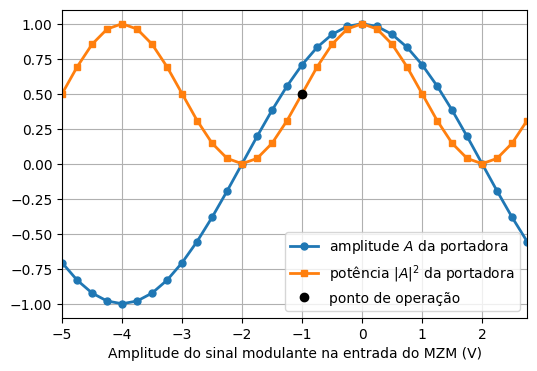

In [18]:
paramMZM = parameters()
paramMZM.Vpi = 2
paramMZM.Vb = -paramMZM.Vpi/2

u = np.arange(-2*paramMZM.Vpi, 2*paramMZM.Vpi, 0.25) # gera values entre -2Vπ e 2Vπ

Ai = 1
Ao = mzm(Ai, u, paramMZM)


plt.figure(figsize=(6,4))
plt.plot(u+paramMZM.Vb, Ao,'-o', markersize = 5, label = 'amplitude $A$ da portadora', linewidth = 2);
plt.xlabel('Amplitude do sinal modulante na entrada do MZM (V)')
plt.xlim(min(u+paramMZM.Vb), max(u+paramMZM.Vb));

plt.plot(u+paramMZM.Vb, np.abs(Ao)**2, '-s', markersize = 5, label = 'potência $|A|^2$ da portadora', linewidth = 2);
plt.xlabel('Amplitude do sinal modulante na entrada do MZM (V)')
plt.xlim(min(u+paramMZM.Vb), max(u+paramMZM.Vb));

# plota ponto de operação
Aop = mzm(Ai, 0, paramMZM)
plt.plot(paramMZM.Vb, np.abs(Aop)**2,'ko', markersize = 6, label = 'ponto de operação', linewidth = 2);
plt.legend()
plt.grid()

### Transmitindo informação na amplitude do electric field ($V_b = \pm V_π$)

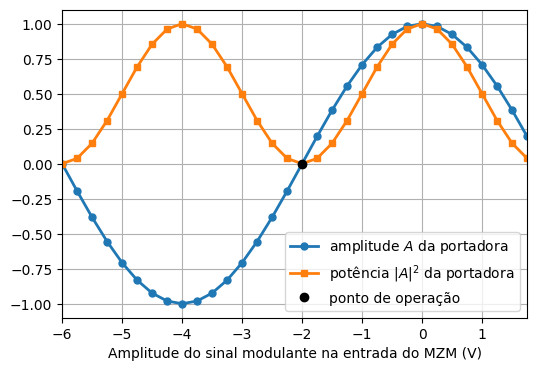

In [19]:
paramMZM = parameters()
paramMZM.Vpi = 2
paramMZM.Vb = -paramMZM.Vpi

u  = np.arange(-2*paramMZM.Vpi, 2*paramMZM.Vpi, 0.25) # gera values entre -2Vπ e 2Vπ

Ai = 1
Ao = mzm(Ai, u, paramMZM)

plt.figure(figsize=(6,4))
plt.plot(u+paramMZM.Vb, Ao,'-o', markersize = 5, label = 'amplitude $A$ da portadora', linewidth = 2);
plt.xlabel('Amplitude do sinal modulante na entrada do MZM (V)')
plt.xlim(min(u+paramMZM.Vb), max(u+paramMZM.Vb));

plt.plot(u+paramMZM.Vb, np.abs(Ao)**2, '-s', markersize = 5, label = 'potência $|A|^2$ da portadora', linewidth = 2);
plt.xlabel('Amplitude do sinal modulante na entrada do MZM (V)')
plt.xlim(min(u+paramMZM.Vb), max(u+paramMZM.Vb));

# plota ponto de operação
Aop = mzm(Ai, 0, paramMZM)
plt.plot(paramMZM.Vb, Aop,'ko', markersize = 6, label = 'ponto de operação', linewidth = 2);
plt.legend()
plt.grid()

### Razão de extinção

$$ER_{dB} = 10\log_{10}\frac{P_1}{P_0} $$

Razão de extinção (extinction ratio - ER)
ER = 30.45 dB


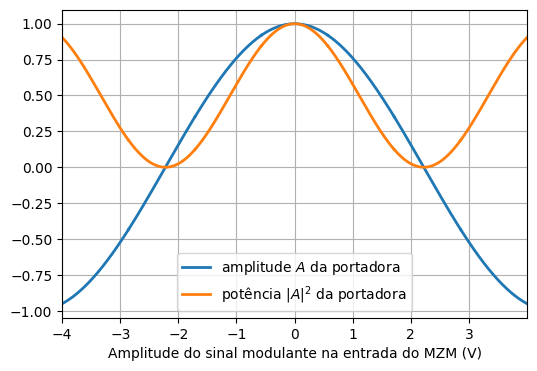

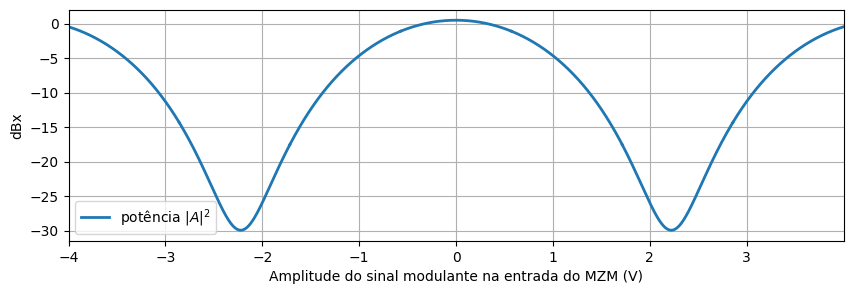

In [20]:
# parameters of the MZM
paramMZM = parameters()
paramMZM.Vpi = 2
paramMZM.Vb = 0
u  = np.arange(-2*paramMZM.Vpi, 2*paramMZM.Vpi, 0.00013) # gera values entre -2Vπ e 2Vπ

Ai = 1
Ao = mzm(Ai, 0.9*u, paramMZM) # gera a curva de resposta o MZM

plt.figure(figsize=(6,4))
plt.plot(u, Ao,'-', markersize = 5, label = 'amplitude $A$ da portadora', linewidth = 2);
plt.xlabel('Amplitude do sinal modulante na entrada do MZM (V)')
plt.xlim(min(u), max(u));

plt.plot(u, np.abs(Ao)**2, '-', markersize = 5, label = 'potência $|A|^2$ da portadora', linewidth = 2);
plt.xlabel('Amplitude do sinal modulante na entrada do MZM (V)')
plt.xlim(min(u), max(u));
plt.legend()
plt.grid()

P  = 10*np.log((np.abs(Ao)**2 + 0.05))

plt.figure()
plt.plot(u, P, label = 'potência $|A|^2$', linewidth = 2);
plt.xlabel('Amplitude do sinal modulante na entrada do MZM (V)')
plt.ylabel('dBx')
plt.xlim(min(u), max(u));
plt.legend()
plt.grid()

print('Razão de extinção (extinction ratio - ER)')

print('ER = %.2f dB'%(max(P)-min(P)))

## Intervalos de sinalização

Transmitters digitais fazem uso do channel de communication para transmitir informação de acordo com uma base de time, geralmente denomidade de **intervalo de sinalização** ($T_s$). O intervalo de sinalização é o intervalo de time no qual o transmitter envia um símbolo discreto mapeado num pulso contínuo. O inverso do intervalo de sinalização é denominado de rate de transmissão de símbolos ($R_s$), i.e. $R_s=1/T_s$.

A quantidade de bits enviada em cada intervalo de sinalização multiplicada por $R_s$ corresponde à rate de transmissão de bits do system ($R_b$). Assumindo que cada símbolo de uma modulation digital representa uma sequência de $k$ bits, temos que:

$$R_b = kR_s $$

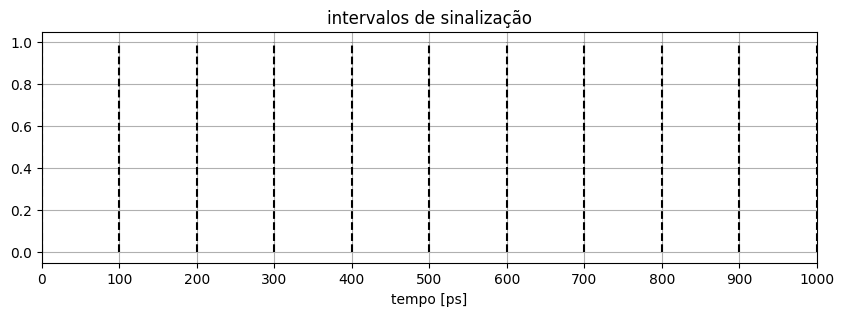

In [21]:
Rs  = 10e9  # Symbol rate [baud]
Ts  = 1/Rs  # Período de símbolo em segundos
N   = 10    # number de intervalos de sinalização

t = np.arange(0, N+1)*(Ts/1e-12) # time em picosegundos (ps)

plt.vlines(t, 0, 1, linestyles='dashed', color = 'k')    
plt.xlabel('tempo [ps]');
plt.title('intervalos de sinalização');
plt.grid()
plt.xticks(t);
plt.xlim(0, t.max());

### Teorema da amostragem

O teorema de amostragem de *Nyquist-Shannon* é um dos results mais importantes utilizados em processamento digital de signals, servindo como uma ponte fundamental entre signals de time contínuo e signals de time discreto. O teorema estabelece uma **condição suficiente** para uma rate de amostragem que permite que uma sequência discreta de amostras capture toda a informação de um signal contínuo no time e de largura de banda finita.

Considerre $x(t)$ um signal limitado em banda, i.e. o spectrum de frequencies de $X(f)=\mathcal{F}\{x(t)\}$ está contido no intervalo $-B\leq f \leq B$, ou seja 

$$ X(f) = \int_{-\infty}^{\infty} x(t)e^{j2\pi f t} dt = 0 \text{, se } f < -B \text{ ou } f > B$$

Suponha que obtenhamos um signal discreto no time $x[k]$ from um conjunto de amostras equiespaçadas de $x(t)$, ou seja $x[k]=x(kT_a)$, em que $T_a = \frac{1}{f_a}$ é o período de amostragem e $f_a$ a frequency de amostragem.

Se $f_a\geq 2B$, $x(t)$ pode ser perfeitamente reconstruído from suas amostras $x[k]$ fazendo

$$
x(t)=\sum_{n=-\infty}^{\infty} x(k T_a) \operatorname{sinc}\left(\frac{t-kT_a}{T_a}\right).
$$


In [22]:
from optic.comm.metrics import signal_power
from optic.dsp.core import firFilter, pulseShape
from optic.plot import eyediagram

def sincInterp(x, fa):
    
    fa_sinc = 32*fa
    Ta_sinc = 1/fa_sinc
    Ta = 1/fa
    t = np.arange(0, x.size*32)*Ta_sinc
    
    plt.figure()  
    y = upsample(x,32)
    y[y==0] = np.nan
    plt.plot(t,y.real,'ko', label='x[k]')
    
    x_sum = 0
    for k in range(0, x.size):
        xk_interp = x[k]*np.sinc((t-k*Ta)/Ta)
        x_sum += xk_interp
        plt.plot(t, xk_interp)           
    
    plt.legend(loc="upper right")
    plt.xlim(min(t), max(t))
    plt.grid()
    
    return x_sum, t

### Example 1: function sinc(t)

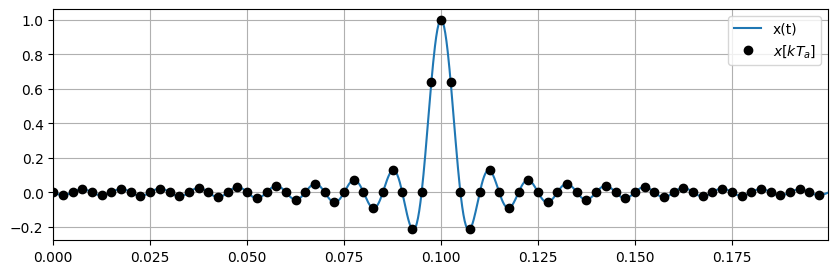

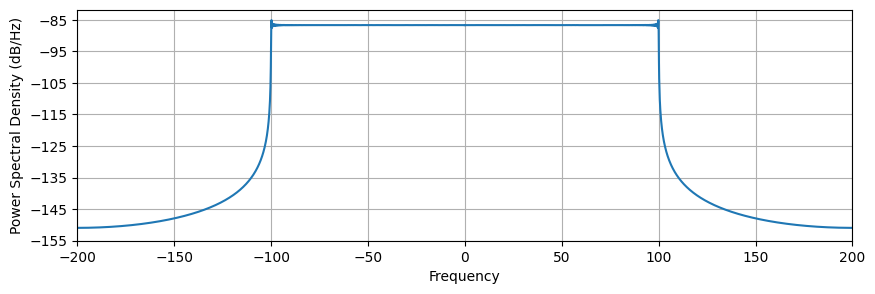

In [23]:
Fa = 400   # frequency de amostragem
B  = 100   # banda da sinc
Ta = 1/Fa  # período de amostragem

t = np.arange(0, 0.2, Ta/16) # duração do signal [s]
d = t.size/2
x = np.sinc(2*B*(t-d*(Ta/16)))

# signal amostrado com frequency de amostragem fa
xa = x[::16]
ta = t[::16]

plt.figure()
plt.plot(t, x,'-', label = 'x(t)')
plt.plot(ta, xa,'ko', label = '$x[kT_a]$')
plt.grid()
plt.legend()
plt.xlim(min(t), max(t))

# plota psd
x_psd = np.sinc(2*B*((np.arange(0, 2000)*Ta)-1000*Ta))
plt.figure();
plt.psd(x_psd, Fs=Fa, NFFT = 16*1024, sides='twosided')
plt.xlim(-Fa/2, Fa/2);

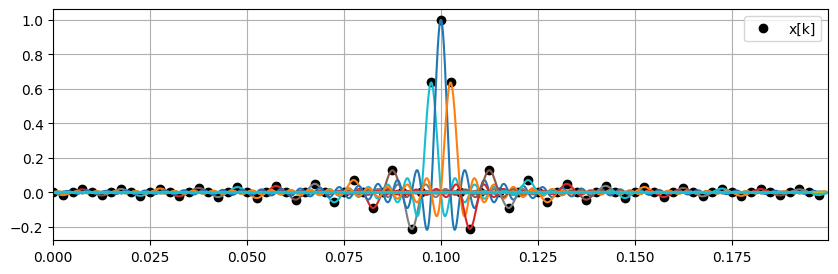

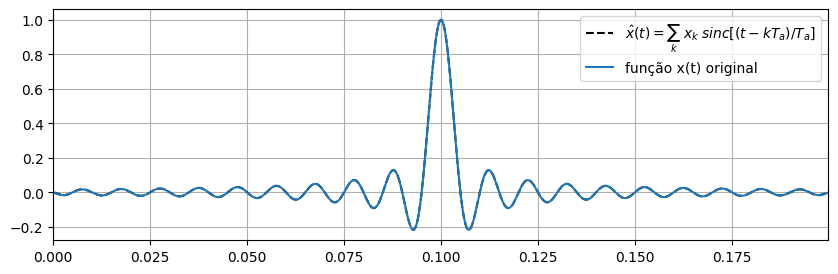

In [24]:
x_interp, t_interp = sincInterp(xa, Fa);

plt.figure()
plt.plot(t_interp, x_interp,'--k',label ='$\hat{x}(t) =\sum_{k}\;x_{k}\;sinc[(t-kT_a)/T_a]$');
plt.plot(t, x,'-',label = 'função x(t) original')
plt.xlim(min(t), max(t))
plt.grid()
plt.legend();

### Example 2: chirp de frequency linear

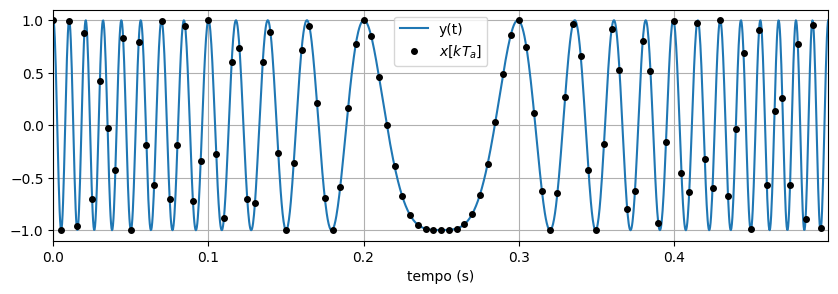

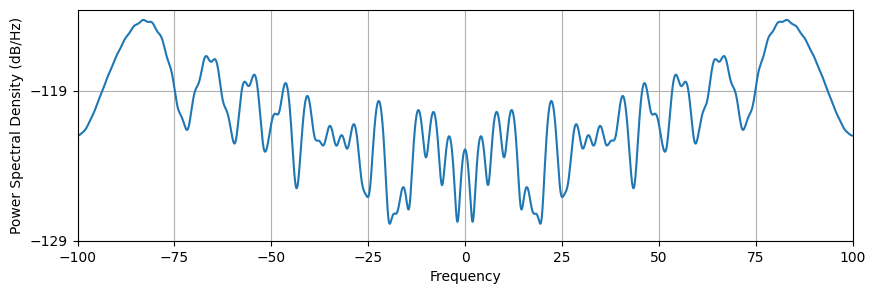

In [25]:
from scipy.signal import chirp

Fa = 200   # frequency de amostragem
Ta = 1/Fa  # período de amostragem
B  = 100

d = 1600
t = np.arange(0, 0.5, Ta/16) # duração do signal [s]

x = chirp(t, f0=-100, f1=100, t1=max(t), method='linear')

# signal amostrado com frequency de amostragem fa
xa = x[::16]
ta = t[::16]

plt.figure()
plt.plot(t, x,'-', label = 'y(t)')
plt.plot(ta, xa,'ko', markersize = 4, label = '$x[kT_a]$')
plt.xlabel('tempo (s)')
plt.grid()
plt.legend()
plt.xlim(min(t), max(t))

# plota psd
plt.figure();
plt.psd(xa, Fs=Fa, NFFT = 16*1024, sides='twosided')
plt.xlim(-Fa/2, Fa/2);

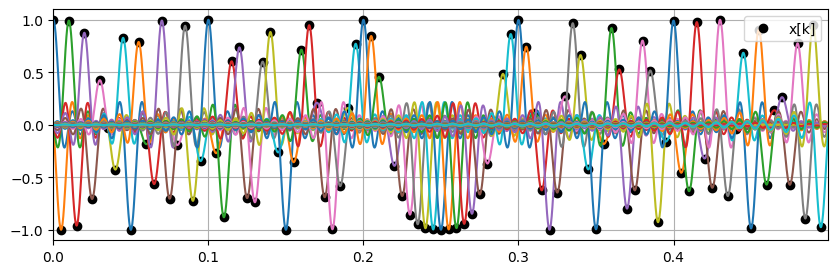

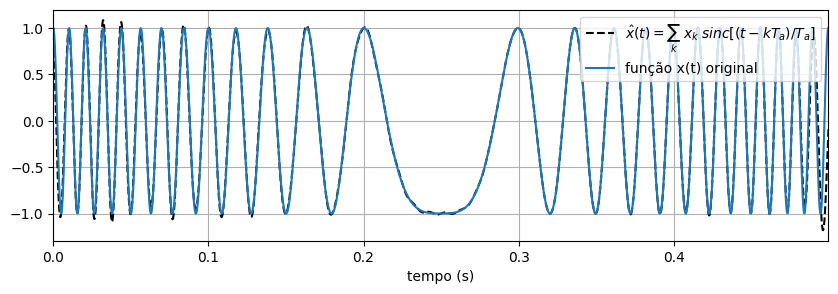

In [26]:
x_interp, t_interp = sincInterp(xa, Fa);

plt.figure()
plt.plot(t_interp, x_interp,'--k',label ='$\hat{x}(t) =\sum_{k}\;x_{k}\;sinc[(t-kT_a)/T_a]$');
plt.plot(t, x,'-',label = 'função x(t) original')
plt.xlabel('tempo (s)')
plt.xlim(min(t), max(t))
plt.grid()
plt.legend(loc='upper right');

## Modulation de amplitude OOK

$ E(t)=\operatorname{Re}\left[A(t) e^{j \theta} \exp \left(j \omega_c t\right)\right]$

$$ \begin{align} A(t) &= \left[ \sum_{n} s_{n} \delta \left(t-n T_{s}\right)\right] \ast p(t) \nonumber \\ & = \sum_{n} s_{n} p\left(t-n T_{s}\right)\end{align}$$

In [27]:
# parameters of the simulation
Rs     = 10e9          # Symbol rate (para o caso do OOK Rs = Rb)
Ts     = 1/Rs          # Período de símbolo em segundos

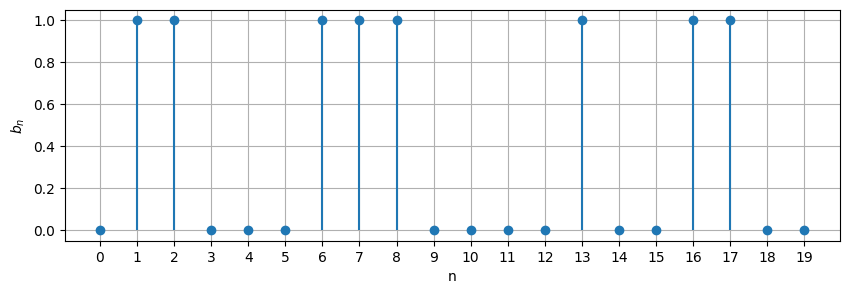

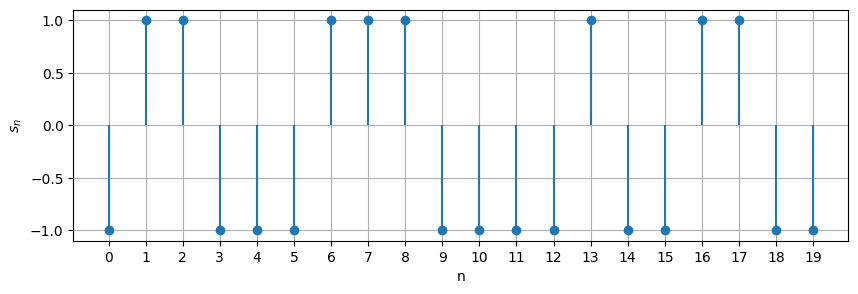

In [28]:
# gera sequência de bits pseudo-aleatórios
bits   = np.random.randint(2, size=20)    
n      = np.arange(0, bits.size)

# mapeia bits para símbolos binários
symbTx = 2*bits-1

plt.figure(1)
plt.stem(bits, basefmt=" ")
plt.xlabel('n')
plt.ylabel('$b_n$')
plt.grid()
plt.xticks(np.arange(0, bits.size));

plt.figure(2)
plt.stem(symbTx, basefmt=" ")
plt.xlabel('n')
plt.ylabel('$s_n$')
plt.grid()
plt.xticks(np.arange(0, symbTx.size));

### Gerando signals binários OOK

#### Pulso retangular ideal

<IPython.core.display.Math object>

<IPython.core.display.Math object>

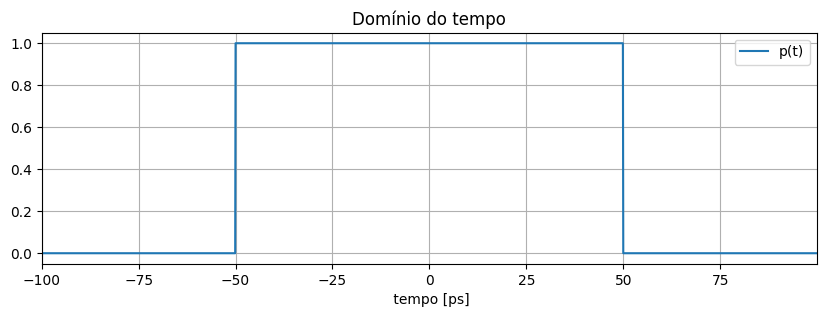

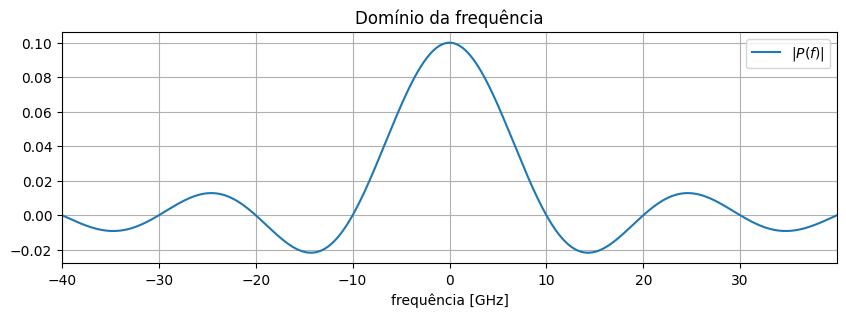

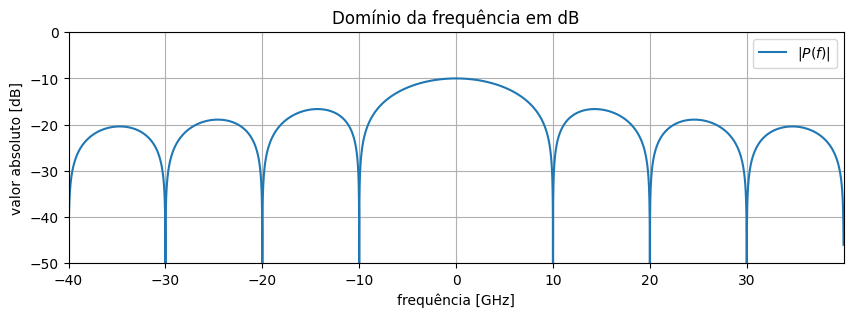

In [29]:
from sympy import fourier_transform as FT
from sympy import inverse_fourier_transform as iFT
from sympy import oo as infty

def rect(t, a):
    return (sp.Heaviside(t + a) - sp.Heaviside(t - a))

t, f = sp.symbols('t, f', real=True)
Ts = sp.symbols('T_s', real=True, positive=True)

# pulso retangular
p = rect(t, Ts/2)
P = FT(p, t, f)

symdisp('p(t) = ', p)
symdisp('P(f) = ', P)

intervalo_f = np.arange(-4, 4, 0.001)*(Rs/1e9)
intervalo_t = np.arange(-1, 1, 0.001)*(1/(Rs/1e12))

symplot(t, p.subs({Ts:1/(Rs/1e12)}), intervalo_t, funLabel='p(t)', xlabel=' tempo [ps]');
plt.title('Domínio do tempo')
symplot(f, P.subs({Ts:1/(Rs/1e9)}), intervalo_f, funLabel='$|P(f)|$', xlabel= 'frequência [GHz]');
plt.title('Domínio da frequência')
symplot(f, 10*sp.log(sp.Abs(P.subs({Ts:1/(Rs/1e9)})), 10), intervalo_f, funLabel='$|P(f)|$', 
        xlabel= 'frequência [GHz]', ylabel= 'valor absoluto [dB]');
plt.title('Domínio da frequência em dB')
plt.ylim(-50, 0);

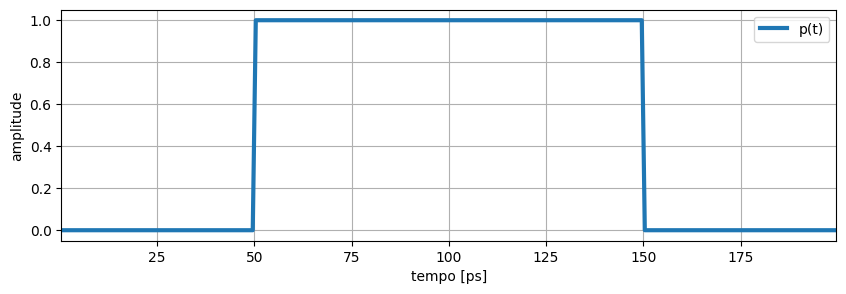

In [30]:
# parameters of the simulation
SpS = 128           # Amostras por símbolo
Rs  = 10e9          # Symbol rate (para o caso do OOK Rs = Rb)
Ts  = 1/Rs          # Período de símbolo em segundos
Fa  = 1/(Ts/SpS)    # Frequency de amostragem do signal (amostras/second)
Ta  = 1/Fa          # Período de amostragem

# pulso retangular ideal
pulse = pulseShape('rect', SpS)
pulse = pulse/max(abs(pulse))

t = (0.5+np.arange(0, pulse.size))*(Ta/1e-12) # time em ps

plt.figure(1)
plt.plot(t, pulse,'-', label = 'p(t)', linewidth=3)
plt.xlabel('tempo [ps]')
plt.ylabel('amplitude')
plt.xlim(min(t), max(t))
plt.grid()
plt.legend();

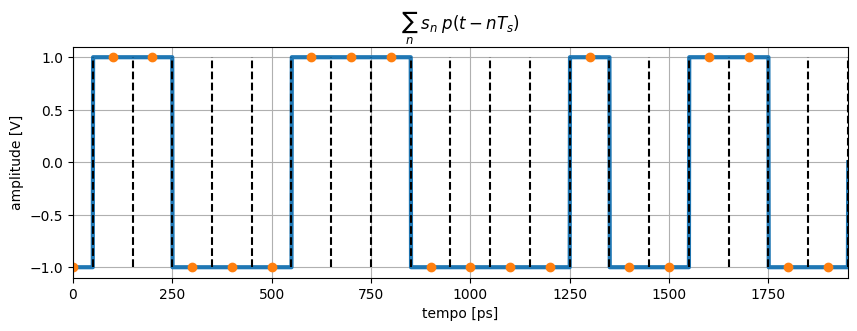

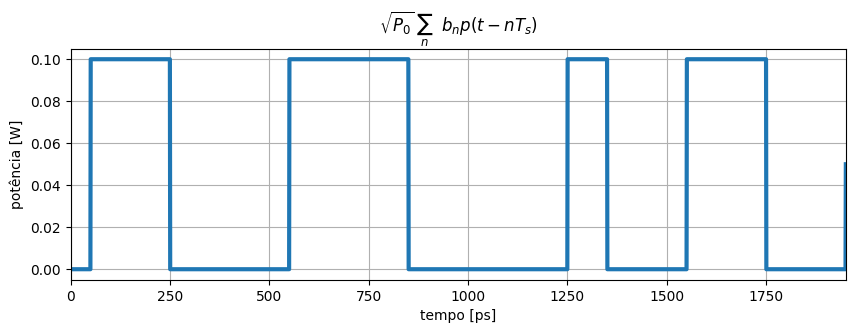

In [31]:
# upsampling
symbolsUp = upsample(symbTx, SpS)

# formatação de pulso retangular
sigTx  = firFilter(pulse, symbolsUp)
sigTx  = sigTx.real

# plota signal 
t = np.arange(0, sigTx.size)*(Ta/1e-12)

# instantes centrais dos intervalos de sinalização
symbolsUp = upsample(2*bits-1, SpS).astype(np.float64)
symbolsUp[symbolsUp==0] = np.nan

plt.figure(2)
plt.plot(t, sigTx,'-', linewidth=3)
plt.plot(t, symbolsUp.real, 'o')
plt.xlabel('tempo [ps]')
plt.ylabel('amplitude [V]')
plt.title('$\sum_{n}\;s_{n}\;p(t-n T_s)$')
plt.grid()

t = (0.5 + np.arange(0, bits.size))*(Ts/1e-12)
plt.vlines(t, -1, 1, linestyles='dashed', color = 'k');
plt.xlim(0, max(t));

# modulation optical
paramMZM = parameters()
paramMZM.Vpi = 2
paramMZM.Vb = -paramMZM.Vpi/2

P0 = 100e-3 # power da portadora CW na input no MZM
Ai = np.sqrt(P0)
sigTxo = mzm(Ai, (paramMZM.Vpi/2)*sigTx, paramMZM)

# plota signal 
t = np.arange(0, sigTxo.size)*(Ta/1e-12)

plt.figure(3)
plt.plot(t, np.abs(sigTxo)**2,'-', linewidth=3)
plt.xlabel('tempo [ps]')
plt.ylabel('potência [W]')
plt.title('$\sqrt{P_0}\;\sum_{n}\;\;b_{n}p(t-n T_s)$')
plt.grid()

t = (0.5 + np.arange(0, bits.size))*(Ts/1e-12)
plt.xlim(0, max(t));

#### Pulso NRZ típico

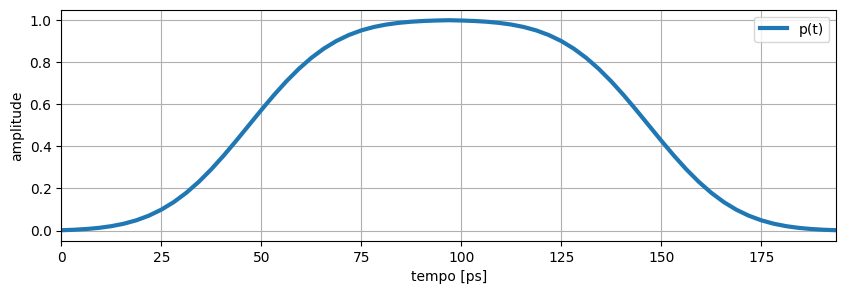

In [32]:
# parameters of the simulation
SpS = 32           # Amostras por símbolo
Fa  = 1/(Ts/SpS)    # Frequency de amostragem do signal (amostras/second)
Ta  = 1/Fa          # Período de amostragem

# pulso NRZ típico
pulse = pulseShape('nrz', SpS)
pulse = pulse/max(abs(pulse))

t = np.arange(0, pulse.size)*(Ta/1e-12)

plt.figure(1)
plt.plot(t, pulse,'-', label = 'p(t)', linewidth=3)
plt.xlabel('tempo [ps]')
plt.ylabel('amplitude')
plt.xlim(min(t), max(t))
plt.grid()
plt.legend();

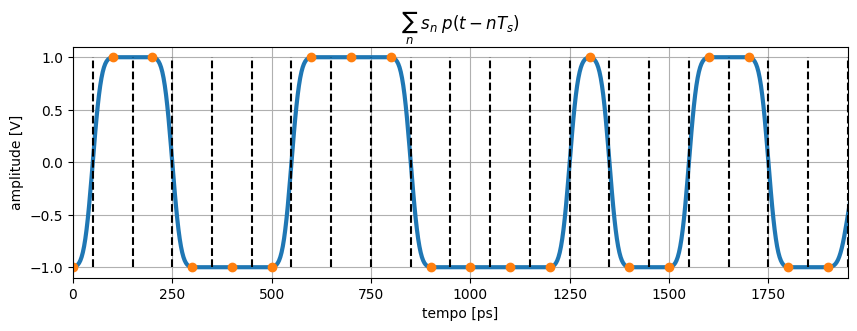

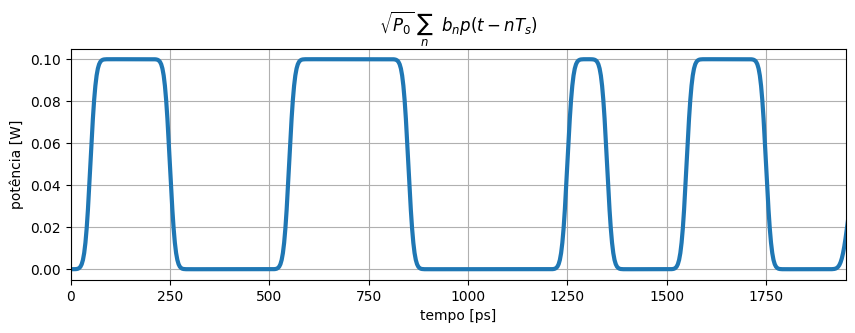

In [33]:
# upsampling
symbolsUp = upsample(symbTx, SpS).astype(np.float64)

# formatação de pulso NRZ
sigTx  = firFilter(pulse, symbolsUp)
sigTx = sigTx.real

t = np.arange(0, sigTx.size)*(Ta/1e-12)

# instantes centrais dos intervalos de sinalização
symbolsUp[symbolsUp==0] = np.nan

plt.figure(2)
plt.plot(t, sigTx,'-',linewidth=3)
plt.plot(t, symbolsUp.real,'o')
plt.xlabel('tempo [ps]')
plt.ylabel('amplitude [V]')
plt.title('$\sum_{n}\;s_{n}\;p(t-n T_s)$')
plt.grid()

t = (0.5*Ts + np.arange(0, bits.size*Ts, Ts))/1e-12
plt.vlines(t, -1, 1, linestyles='dashed', color = 'k');
plt.xlim(0, max(t));

# modulation optical
paramMZM = parameters()
paramMZM.Vpi = 2
paramMZM.Vb = -paramMZM.Vpi/2

P0 = 100e-3 # power da portadora CW na input no MZM
Ai = np.sqrt(P0)
sigTxo = mzm(Ai, (paramMZM.Vpi/2)*sigTx, paramMZM)

# plota signal 
t = np.arange(0, sigTxo.size)*(Ta/1e-12)

plt.figure(3)
plt.plot(t, np.abs(sigTxo)**2,'-', linewidth=3)
plt.xlabel('tempo [ps]')
plt.ylabel('potência [W]')
plt.title('$\sqrt{P_0}\;\sum_{n}\;\;b_{n}p(t-n T_s)$')
plt.grid()

t = (0.5 + np.arange(0, bits.size))*(Ts/1e-12)
plt.xlim(0, max(t));

#### Pulso cosseno levantado

$$\large
p(t)=\left\{\begin{array}{ll}
\frac{\pi}{4 T} \operatorname{sinc}\left(\frac{1}{2 \beta}\right), & t=\pm \frac{T}{2 \beta} \\
\frac{1}{T} \operatorname{sinc}\left(\frac{t}{T}\right) \frac{\cos \left(\frac{\pi \beta t}{T}\right)}{1-\left(\frac{2 \beta t}{T}\right)^{2}}, & \text { caso contrário }
\end{array}\right.
$$

$$\large
P(f)=\left\{\begin{array}{ll}
1, & |f| \leq \frac{1-\beta}{2 T} \\
\frac{1}{2}\left[1+\cos \left(\frac{\pi T}{\beta}\left[|f|-\frac{1-\beta}{2 T}\right]\right)\right], & \frac{1-\beta}{2 T}<|f| \leq \frac{1+\beta}{2 T} \\
0, & \text { caso contrário }
\end{array}\right.
$$

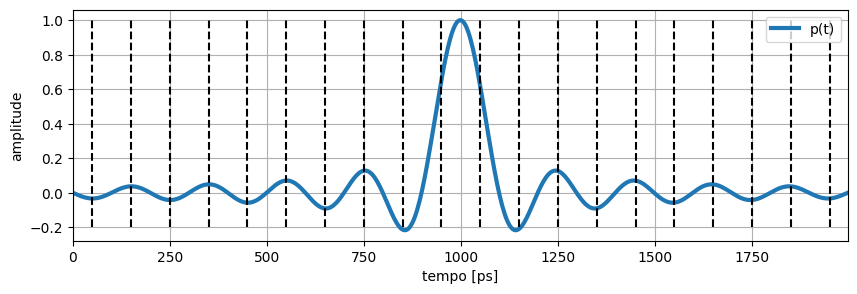

In [34]:
# pulso cosseno levantado (raised cosine)
Ncoeffs = 640
rolloff = 0.01

pulse = pulseShape('rc', SpS, Ncoeffs, rolloff, Ts)
pulse = pulse/max(abs(pulse))

t = np.arange(0, pulse.size)*(Ta/1e-12)

plt.figure(1)
plt.plot(t, pulse,'-', label = 'p(t)', linewidth=3)
plt.xlabel('tempo [ps]')
plt.ylabel('amplitude')
plt.xlim(min(t), max(t))
plt.grid()
plt.legend()

t = (-0.0*Ts + np.arange(0, (Ncoeffs/SpS)*Ts, Ts))/1e-12
plt.vlines(t + 0.5*(Ts/1e-12), -0.2, 1, linestyles='dashed', color = 'k');

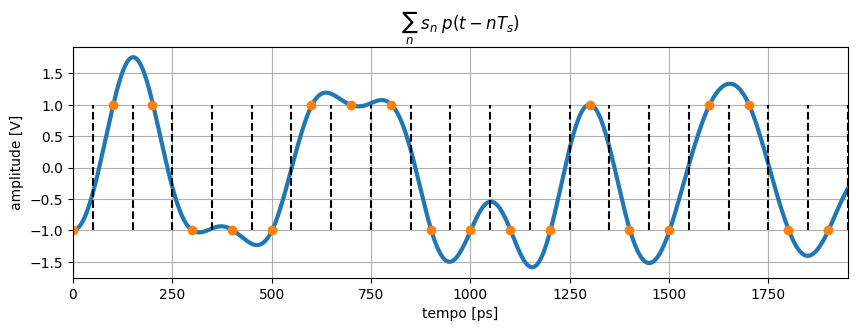

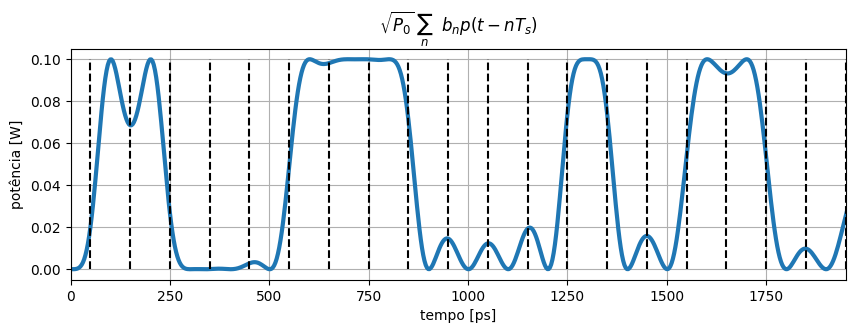

In [35]:
# upsampling
symbolsUp = upsample(symbTx, SpS).astype(np.float64)

# formatação de pulso 
sigTx  = firFilter(pulse, symbolsUp)
sigTx = sigTx.real

t = np.arange(0, sigTx.size)*(Ta/1e-12)

# instantes centrais dos intervalos de sinalização
symbolsUp[symbolsUp==0] = np.nan

plt.figure(2)
plt.plot(t, sigTx,'-', linewidth=3)
plt.plot(t, symbolsUp.real,'o')
plt.xlabel('tempo [ps]')
plt.ylabel('amplitude [V]')
plt.title('$\sum_{n}\;s_{n}\;p(t-n T_s)$')
plt.grid()

t = (0.5*Ts + np.arange(0, bits.size*Ts, Ts))/1e-12
plt.vlines(t, -1, 1, linestyles='dashed', color = 'k');
plt.xlim(0, max(t));

# modulation optical
paramMZM = parameters()
paramMZM.Vpi = 2
paramMZM.Vb = -paramMZM.Vpi/2

P0 = 100e-3 # power da portadora CW na input no MZM
Ai = np.sqrt(P0)
sigTxo = mzm(Ai, (paramMZM.Vpi/2)*sigTx, paramMZM)

# plota signal 
t = np.arange(0, sigTxo.size)*(Ta/1e-12)

plt.figure(3)
plt.plot(t, np.abs(sigTxo)**2,'-', linewidth=3)
plt.xlabel('tempo [ps]')
plt.ylabel('potência [W]')
plt.title('$\sqrt{P_0}\;\sum_{n}\;\;b_{n}p(t-n T_s)$')
plt.grid()

t = (0.5 + np.arange(0, bits.size))*(Ts/1e-12)
plt.xlim(0, max(t));
plt.vlines(t, 0, P0, linestyles='dashed', color = 'k');
plt.xlim(0, max(t));

## Spectral density de power de signals modulados digitalmenente

Considere $v(t)$ seja um signal modulado em banda base no domínio do time associado a uma sequência de símbolos $\{s_n\}$ de um dado formato de modulation, ou seja

$$ \begin{equation}
v(t)=\sum_{n=-\infty}^{\infty} s_{n} p(t-n T).
\end{equation}
$$

em que $p(t)$ é o formato do pulso utilizado. O signal $v(t)$ pode ser entendido como uma realização do process estocástico $V(t)$ que, por sua vez, depende da sequência aleatória de símbolos $\{s_n\}$. Para cada realização distinta de $\{s_n\}$ temos uma form de onda $v(t)$ associada.

### Value average e autocorrelação de $V(t)$


#### Value average

$$
\begin{equation}
\begin{aligned}
E[V(t)] &=\sum_{n=-\infty}^{\infty} E\left[s_{n}\right] p(t-n T) \\
&=m_{s} \sum_{n=-\infty}^{\infty} p(t-n T)
\end{aligned}
\end{equation}
$$

Perceba que $E[V(t)]$ é periódico em $t$ com período $T$, que corresponde ao intervalo de sinalização.

#### Autocorrelação

$$
\begin{equation}
R_{V}(t+\tau, t)=E\left[V^{*}(t) V(t+\tau)\right]=\sum_{n=-\infty}^{\infty} \sum_{m=-\infty}^{\infty} E\left[s_{n}^{*} s_{m}\right] p(t-nT) p(t+\tau-mT)
\end{equation}
$$

Considerando que $\{s_n\}$ seja uma sequência de símbolos de informação estacionária no sentido amplo, sua autocorrelação $R_{s}$ é definida como

$$
\begin{equation}
\begin{aligned}
R_{s}(n,n+m)&=E\left[s_{n}^{*}s_{n+m}\right]\nonumber\\
        &=R_{s}((n+m)-n)\nonumber\\
        &=R_{s}(m)
\end{aligned}
\end{equation}
$$

Logo,
$$
\begin{equation}
R_{V}(t+\tau, t) =\sum_{n=-\infty}^{\infty} \sum_{m=-\infty}^{\infty} R_{s}(m-n) p(t-nT) p(t+\tau-mT).
\end{equation}
$$

Podemos reescrever os somatórios de uma maneira mais conveniente fazendo a mudança de variáveis $m'= m-n$, de form que

$$
\begin{equation}
\begin{aligned}
R_{V}(t+\tau, t) &=\sum_{n=-\infty}^{\infty} \sum_{m=-\infty}^{\infty} R_{s}(m-n) p(t-nT) p(t+\tau-mT)\nonumber\\
                 &=\sum_{n=-\infty}^{\infty} \sum_{m'=-\infty}^{\infty} R_{s}(m') p(t-nT) p(t+\tau-(m'+n)T)\nonumber\\
                 &=\sum_{m'=-\infty}^{\infty} R_{s}(m') \sum_{n=-\infty}^{\infty} p(t-nT) p(t+\tau -nT -m'T)
\end{aligned}
\end{equation}
$$

ou seja, apenas renomeando o index do somatório, temos

$$
\begin{equation}
R_{V}(t+\tau, t) =\sum_{m=-\infty}^{\infty} R_{s}(m) \sum_{n=-\infty}^{\infty} p(t-nT) p(t+\tau -nT -mT)
\end{equation}
$$

Perceba que também a autocorrelação $R_{V}(t+\tau, t)$ é periódica em $t$ com período $T$, o que caracteriza $V(t)$ como um *process cicloestacionário*. Desse mode, podemos caracterizar $V(t)$ pela sua function de autocorrelação média $\bar{R}_{V}(t+\tau, t)$ definida por

$$
\begin{equation}
\begin{aligned}
\bar{R}_{V}(\tau) &=\frac{1}{T} \int_{-T / 2}^{T / 2} R_{V}(t+\tau, t) d t \\
&=\sum_{m=-\infty}^{\infty} R_{s}(m) \sum_{n=-\infty}^{\infty} \frac{1}{T} \int_{-T / 2}^{T / 2} p(t-n T) p(t+\tau-n T-m T) d t \\
&=\sum_{m=-\infty}^{\infty} R_{s}(m) \sum_{n=-\infty}^{\infty} \frac{1}{T} \int_{n T-T / 2}^{n T+T / 2} p(t) p(t+\tau-m T) d t \\
&=\frac{1}{T} \sum_{m=-\infty}^{\infty} R_{s}(m) \int_{-\infty}^{\infty} p(t) p(t+\tau-m T) d t.
\end{aligned}
\end{equation}
$$

A integral $\int_{-\infty}^{\infty} p(t) p(t+\tau-m T) dt$ é interpretada como a autocorrelação temporal $R_{p}(\tau)$ do pulso $p(t)$, ou seja

$$
\begin{equation}
R_{p}(\tau)=\int_{-\infty}^{\infty} p(t) p(t+\tau) dt.
\end{equation}
$$

Assim, temos

$$
\begin{equation}
\bar{R}_{V}(\tau)=\frac{1}{T} \sum_{m=-\infty}^{\infty} R_{s}(m) R_{p}(\tau-m T).
\end{equation}
$$

### Spectral density de power $\mathcal{S}_{V}(f)$

Uma vez estabelecida $\bar{R}_{V}(\tau)$, podemos utilizar o teorema de Wiener-Khinchin [2] para determinar a spectral density de power $\mathcal{S}_{V}(f)$ associada a $V(t)$. O teorema estabelece que $\mathcal{S}_{V}(f)$ e $\bar{R}_{V}(\tau)$ são relacionadas por meio da transformada de Fourier, ou seja

$$
\begin{equation}
\begin{aligned}
\mathcal{S}_{V}(f) &=\int_{-\infty}^{\infty} \bar{R}_{V}(\tau) e^{-j 2 \pi f \tau} d \tau \\
&=\frac{1}{T} \sum_{m=-\infty}^{\infty} R_{s}(m) \int_{-\infty}^{\infty} R_{p}(\tau-m T) e^{-j 2 \pi f \tau} d \tau \\
&=\frac{1}{T} \sum_{m=-\infty}^{\infty} R_{s}(m) e^{j 2 \pi f m T}\int_{-\infty}^{\infty} R_{p}(\tau) e^{-j 2 \pi f \tau} d \tau \\
&=\frac{1}{T} \sum_{m=-\infty}^{\infty} R_{s}(m) e^{-j 2 \pi f m T}\int_{-\infty}^{\infty} \left[\int_{-\infty}^{\infty} p(t) p(t+\tau) d t\right] e^{-j 2 \pi f \tau} d \tau \\
&=\frac{1}{T} \sum_{m=-\infty}^{\infty} R_{s}(m) e^{-j 2 \pi f m T}\int_{-\infty}^{\infty}p(t) e^{j 2 \pi f t}dt\int_{-\infty}^{\infty}p(\tau)e^{-j 2 \pi f \tau} d \tau \\
&=\frac{1}{T} \mathcal{S}_{s}(f)P^*(f)P(f) \\
&=\frac{1}{T} \mathcal{S}_{s}(f)\left|P(f)\right|^{2}.
\end{aligned}
\end{equation}
$$

Portanto,

$$
\begin{equation}
\mathcal{S}_{V}(f) = \frac{1}{T} \mathcal{S}_{s}(f)\left|P(f)\right|^{2},
\end{equation}
$$

em que $\mathcal{S}_{s}(f)$ é dada por
$$
\begin{equation}
\mathcal{S}_{s}(f)=\sum_{m=-\infty}^{\infty} R_{s}(m) e^{-j 2 \pi f m T}.
\end{equation}
$$

Em resumo, a spectral density de power de $\mathcal{S}_{V}(f)$ depende de dois parameters: 

1. Do spectrum de power associado à transformada de Fourier $P(f)$ do pulso $p(t)$.
2. Das caraterísticas espectrais $\mathcal{S}_{s}(f)$ da sequência de símbolos de informação $\{s_n\}$.

No caso particular, que engloba a maioria das situações práticas, os símbolos em $\{s_n\}$ são mutuamente descorrelacionados, de form que

$$
\begin{equation}
R_{s}(m) = \begin{cases}\sigma_{s}^{2}+m_{s}^{2}, & m=0 \\ m_{s}^{2}, & m \neq 0\end{cases}
\end{equation}
$$

em que $\sigma_{s}^{2}+m_{s}^{2}=E[s^2]$ é a energia média dos símbolos da constellation.

ou seja,

$$
\begin{equation}
\mathcal{S}_{s}(f)=\sigma_{s}^{2}+m_{s}^{2} \sum_{m=-\infty}^{\infty} e^{-j 2 \pi f m T}
\end{equation}
$$

Utilizando a ratio entre um trem trem de impulsos no domínio da frequency e sua representação em termos da série de Fourier, temos que

$$
\begin{equation}
\sum_{n=-\infty}^{\infty} e^{-j 2 \pi f mT}=\frac{1}{T} \sum_{m=-\infty}^{\infty} \delta\left(f-\frac{m}{T}\right).
\end{equation}
$$

Assim, podemos reescrever

$$
\begin{equation}
\mathcal{S}_{s}(f)=\sigma_{s}^{2}+\frac{m_{s}^{2}}{T} \sum_{m=-\infty}^{\infty} \delta\left(f-\frac{m}{T}\right).
\end{equation}
$$

Finalmente, $\mathcal{S}_{V}(f)$ será dada por

$$
\begin{equation}
\mathcal{S}_{V}(f)=\frac{\sigma_{s}^{2}}{T}\left|P(f)\right|^{2}+\frac{m_{s}^{2}}{T^{2}} \sum_{m=-\infty}^{\infty}\left|P\left(\frac{m}{T}\right)\right|^{2} \delta\left(f-\frac{m}{T}\right).
\end{equation}
$$

De maneira geral, as constellations dos formatos de modulation ASK, PSK, QAM são definidas de tal form que $m_{s}=0$, bastando apenas que os símbolos sejam posicionados de form simétrica no plano complex. Nesse caso, temos

$$
\begin{equation}
\mathcal{S}_{V}(f)=\frac{\sigma_{s}^{2}}{T}\left|P(f)\right|^{2}
\end{equation}
$$

ou seja, o formato de $\mathcal{S}_{V}(f)$ depende apenas do type de pulso $p(t)$ escolhido.

Para mais detalhes, ver capítulo 8 de [2].

### Examples de spectral density de power de signals modulados

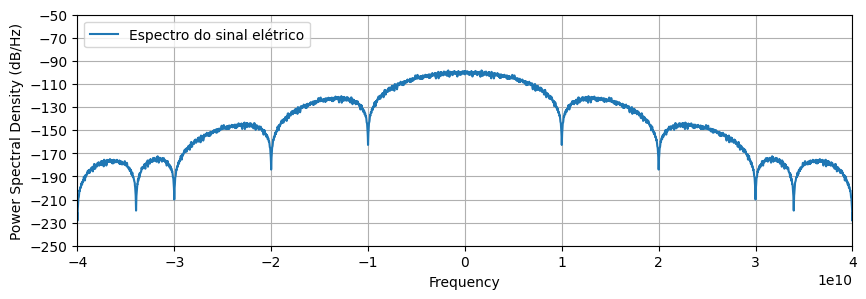

In [36]:
# gera sequência de bits pseudo-aleatórios
bits   = np.random.randint(2, size=10000)    
n      = np.arange(0, bits.size)

# mapeia bits para pulsos elétricos
symbTx = 2*bits-1
symbTx = symbTx/np.sqrt(signal_power(symbTx))

# upsampling
symbolsUp = upsample(symbTx, SpS)

# # pulso cosseno levantado (raised cosine)
# Ncoeffs = 640
# rolloff = 0.1

# pulse = pulseShape('rc', SpS, Ncoeffs, rolloff, Ts)
# pulse = pulse/max(abs(pulse))

# pulso NRZ típico
pulse = pulseShape('nrz', SpS)
pulse = pulse/max(abs(pulse))

# formatação de pulso
sigTx  = firFilter(pulse, symbolsUp)

# plota psd
plt.figure();
plt.xlim(-4*Rs,4*Rs);
plt.ylim(-250,-50);
plt.psd(sigTx,Fs=Fa, NFFT = 16*1024, sides='twosided', label = 'Espectro do sinal elétrico')
plt.legend(loc='upper left');

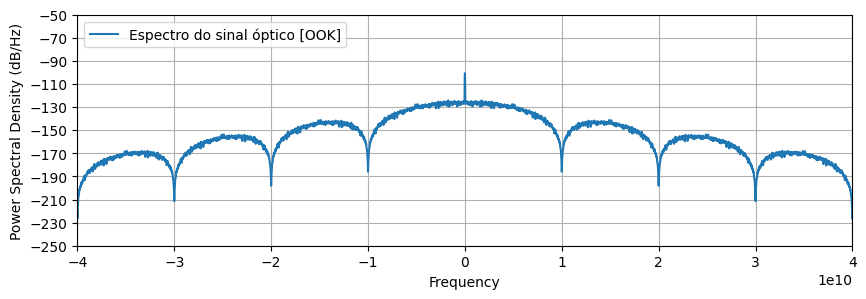

In [37]:
# modulation optical
paramMZM = parameters()
paramMZM.Vpi = 2
paramMZM.Vb = -paramMZM.Vpi/2

P0 = 100e-3 # power da portadora CW na input no MZM
Ai = np.sqrt(P0)
sigTxo = mzm(Ai, (paramMZM.Vpi/2)*sigTx, paramMZM)

# plota psd
plt.figure();
plt.xlim(-4*Rs,4*Rs);
plt.ylim(-250,-50);
plt.psd(np.abs(sigTxo)**2,Fs=Fa, NFFT = 16*1024, sides='twosided', label = 'Espectro do sinal óptico [OOK]')
plt.legend(loc='upper left');

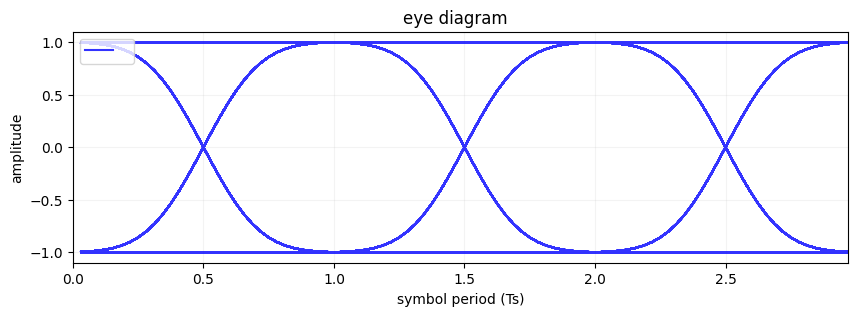

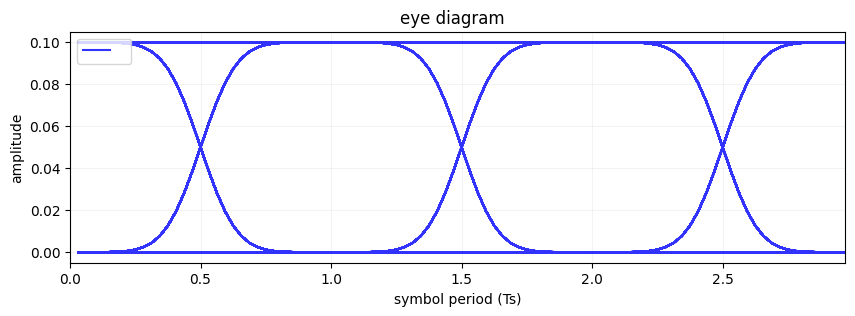

In [38]:
Nsamples = 10000

# diagram de olho
eyediagram(sigTx, Nsamples, SpS)
eyediagram(np.abs(sigTxo)**2, Nsamples, SpS)

## Gerando signals M-PAM

In [39]:
def genConst(M, plotBits):
    constType='pam'
    
    try:
        plt.figure(figsize=(4,4))
        plt.plot([],[])
        plt.grid()
        plt.ylabel('$A_Q$', fontsize=14)
        plt.xlabel('$A_I$', fontsize=14)
        plt.axis('square')

        # plot modulation bit-to-symbol mapping    
        constSymb = grayMapping(M, constType)             # Gray constellation mapping
        bitMap = demodulateGray(constSymb, M, constType)  # bit mapping
        bitMap = bitMap.reshape(-1, int(np.log2(M)))

        # generate random bits
        bits = bitMap.reshape(1, -1)

        # Map bits to constellation symbols
        symbTx = modulateGray(bits, M, constType)

        # normalize symbols energy to 1
        if constType == 'ook':
            plt.xlim(-1.25*max(symbTx.real),1.25*max(symbTx.real))
            plt.ylim(-1.25*max(symbTx.real),1.25*max(symbTx.real));
            plt.vlines(0, -1.25*max(symbTx.real),1.25*max(symbTx.real))
            plt.hlines(0, -1.25*max(symbTx.real),1.25*max(symbTx.real))
        else:
            plt.xlim(1.25*min(symbTx.real),1.25*max(symbTx.real))
            plt.ylim(1.25*min(symbTx.real),1.25*max(symbTx.real));
            plt.vlines(0, 1.25*min(symbTx.real), 1.25*max(symbTx.real))
            plt.hlines(0, 1.25*min(symbTx.real), 1.25*max(symbTx.real))
        
        if M>64:
            plt.plot(symbTx.real, symbTx.imag,'o', markersize=4);
        else:
            plt.plot(symbTx.real, symbTx.imag,'o', markersize=10);                
      
        plt.title('Constelação '+str(M)+'-'+constType.upper());
        
        if plotBits:
            if M>=64:
                fontSize = 6
            else:
                fontSize = 12

            for ind, symb in enumerate(constSymb):
                bitMap[ind,:]
                plt.annotate(str(bitMap[ind,:])[1:-1:2], xy = (symb.real-0.05, symb.imag+0.15), size=fontSize)
        
    except:
        return    
    
interact(genConst, M=[2, 4, 8, 16, 64, 256, 1024], plotBits=[True, False]);

interactive(children=(Dropdown(description='M', options=(2, 4, 8, 16, 64, 256, 1024), value=2), Dropdown(descr…

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
bits 0,1,1,1,0,1,1,1,1,1,0,0,0,1,1,0,1,1,1,0,1
bits 1,1,1,0,0,0,1,0,1,1,0,0,0,1,1,1,1,0,0,1,0


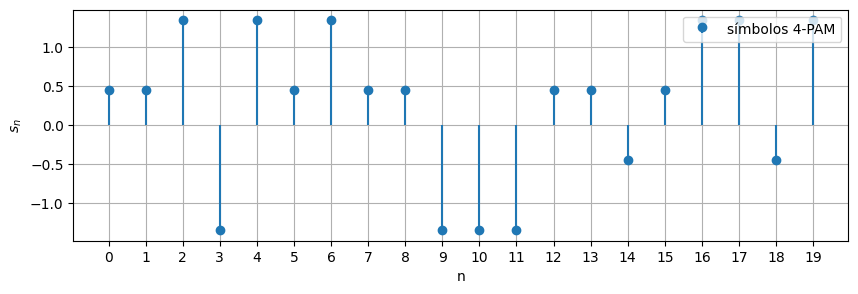

In [40]:
# parameters of the simulation
M = 4               # ordem da modulation
constType = 'pam'   # type de modulation
SpS = 16            # Amostras por símbolo
Rs  = 10e9          # Symbol rate
Ts  = 1/Rs          # Período de símbolo em segundos
Fa  = 1/(Ts/SpS)    # Frequency de amostragem do signal (amostras/second)
Ta  = 1/Fa          # Período de amostragem

# generate pseudo-random bit sequence
bitsTx = np.random.randint(2, size = int(20*np.log2(M)))

# generate ook modulated symbol sequence
symbTx = modulateGray(bitsTx, M, constType)    
symbTx = pnorm(symbTx) # power normalization

plt.stem(symbTx, basefmt=" ", label ='símbolos 4-PAM')
plt.xlabel('n')
plt.ylabel('$s_n$')
plt.grid()
plt.legend(loc='upper right')
plt.xticks(np.arange(0, symbTx.size));

df = pd.DataFrame()
for b in range(int(np.log2(M))):
    df['bits '+str(b)] = bitsTx[b::int(np.log2(M))]

display(df.T)

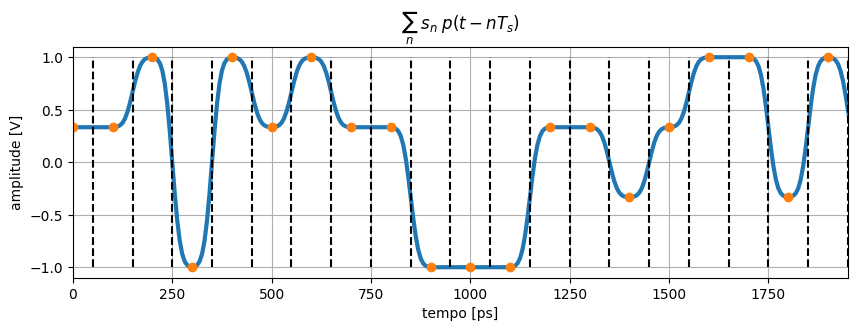

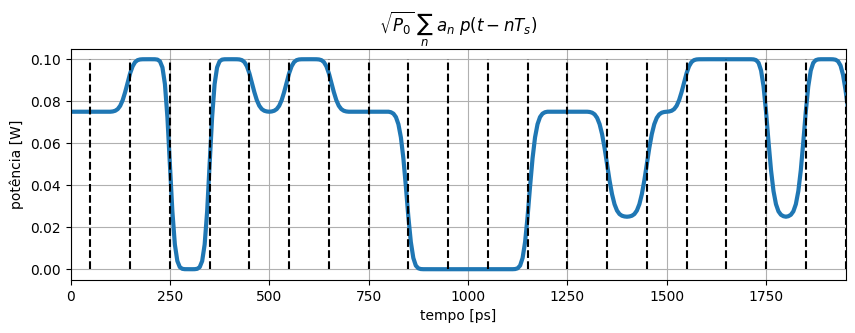

In [41]:
# upsampling
symbolsUp = upsample(symbTx, SpS)

# pulso NRZ típico
pulse = pulseShape('nrz', SpS)
pulse = pulse/max(abs(pulse))

# formatação de pulso
sigTx  = firFilter(pulse, symbolsUp)
sigTx = sigTx.real
sigTx = sigTx/np.max(np.abs(sigTx)) # ajusta amplitudes do signal para variar entre -1 e 1

t = np.arange(0, sigTx.size)*(Ta/1e-12)

# instantes centrais dos intervalos de sinalização
symbolsUp = upsample(symbTx, SpS)
symbolsUp = symbolsUp/np.max(np.abs(symbolsUp))
symbolsUp[symbolsUp==0] = np.nan

plt.figure(2)
plt.plot(t, sigTx,'-',linewidth=3)
plt.plot(t, symbolsUp.real,'o')
plt.xlabel('tempo [ps]')
plt.ylabel('amplitude [V]')
plt.title('$\sum_{n}\;s_{n}\;p(t-n T_s)$')
plt.grid()

t = (0.5*Ts + np.arange(0, symbTx.size*Ts, Ts))/1e-12
plt.vlines(t, -1, 1, linestyles='dashed', color = 'k');
plt.xlim(0, max(t));

# modulation optical
paramMZM = parameters()
paramMZM.Vpi = 2
paramMZM.Vb = -paramMZM.Vpi/2

P0 = 100e-3 # power da portadora CW na input no MZM
Ai = np.sqrt(P0)
sigTxo = mzm(Ai, (paramMZM.Vpi/2)*sigTx, paramMZM)

# plota signal 
t = np.arange(0, sigTxo.size)*(Ta/1e-12)

plt.figure(3)
plt.plot(t, np.abs(sigTxo)**2,'-', linewidth=3)
plt.xlabel('tempo [ps]')
plt.ylabel('potência [W]')
plt.title('$\sqrt{P_0}\;\sum_{n}\;a_{n}\;p(t-n T_s)$')
plt.grid()

t = (0.5 + np.arange(0, symbTx.size))*(Ts/1e-12)
plt.xlim(0, max(t));
plt.vlines(t, 0, P0, linestyles='dashed', color = 'k');
plt.xlim(0, max(t));

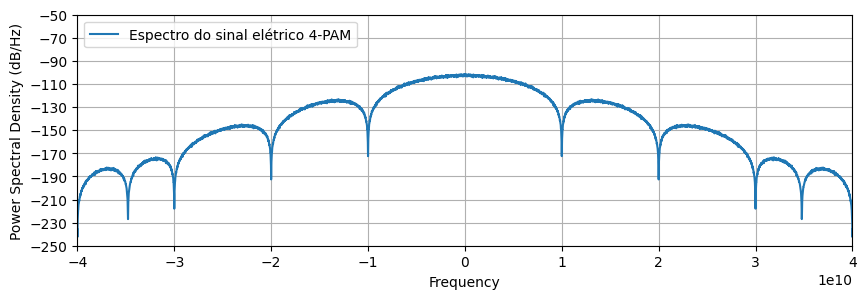

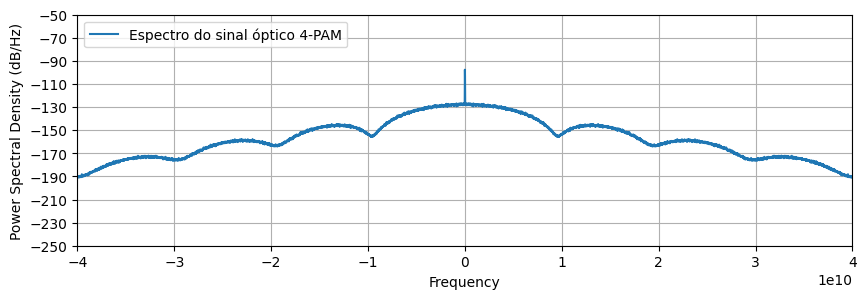

In [42]:
# parameters of the simulation
M = 4               # ordem da modulation
constType = 'pam'   # type de modulation
SpS = 16            # Amostras por símbolo
Rs  = 10e9          # Symbol rate
Ts  = 1/Rs          # Período de símbolo em segundos
Fa  = 1/(Ts/SpS)    # Frequency de amostragem do signal (amostras/second)
Ta  = 1/Fa          # Período de amostragem

# generate pseudo-random bit sequence
bitsTx = np.random.randint(2, size = int(10e4*np.log2(M)))

# generate ook modulated symbol sequence
symbTx = modulateGray(bitsTx, M, constType)    
symbTx = pnorm(symbTx) # power normalization

# upsampling
symbolsUp = upsample(symbTx, SpS)

# pulso NRZ típico
pulse = pulseShape('nrz', SpS)
pulse = pulse/max(abs(pulse))

# formatação de pulso
sigTx  = firFilter(pulse, symbolsUp)
sigTx = sigTx.real
sigTx = sigTx/np.max(np.abs(sigTx)) # ajusta amplitudes do signal para variar entre -1 e 1

# modulation optical
paramMZM = parameters()
paramMZM.Vpi = 2
paramMZM.Vb = -paramMZM.Vpi/2

P0 = 100e-3 # power da portadora CW na input no MZM
Ai = np.sqrt(P0)
sigTxo = mzm(Ai, (paramMZM.Vpi/2)*sigTx, paramMZM)

Nsamples = 20000

# plota psd
plt.figure();
plt.xlim(-4*Rs,4*Rs);
plt.ylim(-250,-50);
plt.psd(sigTx,Fs=Fa, NFFT = 16*1024, sides='twosided', label = 'Espectro do sinal elétrico 4-PAM')
plt.legend(loc='upper left');


# plota psd
plt.figure();
plt.xlim(-4*Rs,4*Rs);
plt.ylim(-250,-50);
plt.psd(np.abs(sigTxo)**2,Fs=Fa, NFFT = 16*1024, sides='twosided', label = 'Espectro do sinal óptico 4-PAM')
plt.legend(loc='upper left');

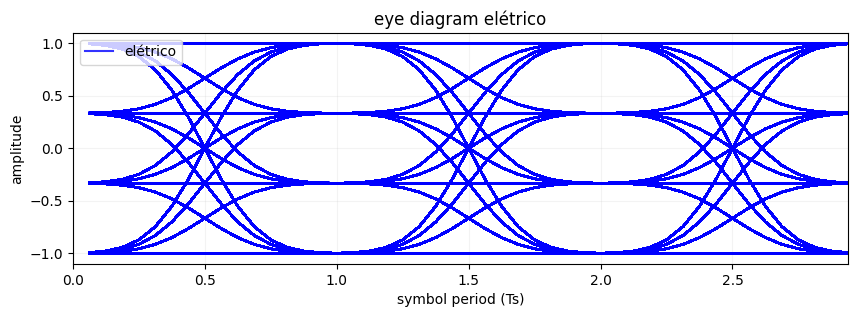

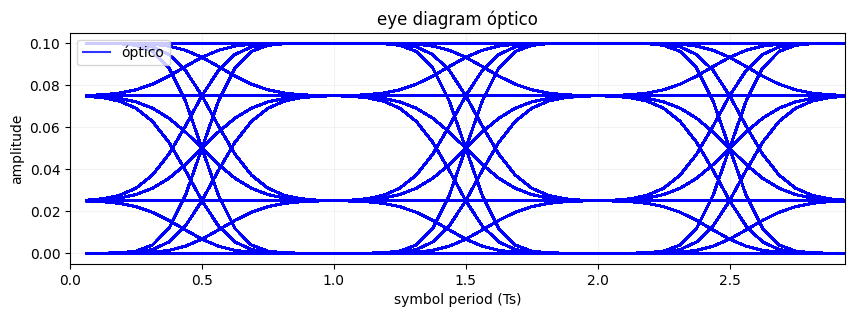

In [43]:
# diagram de olho
eyediagram(sigTx, sigTxo.size-SpS, SpS, plotlabel='elétrico')

# diagram de olho
eyediagram(np.abs(sigTxo)**2, sigTxo.size-SpS, SpS, plotlabel='óptico')

## Gerando signals modulados em phase e quadratura (PSK, QAM)

In [44]:
def genConst(M, constType, plotBits):
    try:
        plt.figure(figsize=(4,4))
        plt.plot([],[])
        plt.grid()
        plt.ylabel('$A_Q$', fontsize=14)
        plt.xlabel('$A_I$', fontsize=14)
        plt.axis('square')

        # plot modulation bit-to-symbol mapping    
        constSymb = grayMapping(M, constType)             # Gray constellation mapping
        bitMap = demodulateGray(constSymb, M, constType)  # bit mapping
        bitMap = bitMap.reshape(-1, int(np.log2(M)))

        # generate random bits
        bits = bitMap.reshape(1, -1)

        # Map bits to constellation symbols
        symbTx = modulateGray(bits, M, constType)

        # normalize symbols energy to 1
        if constType == 'ook':
            plt.xlim(-1.25*max(symbTx.real),1.25*max(symbTx.real))
            plt.ylim(-1.25*max(symbTx.real),1.25*max(symbTx.real));
            plt.vlines(0, -1.25*max(symbTx.real),1.25*max(symbTx.real))
            plt.hlines(0, -1.25*max(symbTx.real),1.25*max(symbTx.real))
        else:
            plt.xlim(1.25*min(symbTx.real),1.25*max(symbTx.real))
            plt.ylim(1.25*min(symbTx.real),1.25*max(symbTx.real));
            plt.vlines(0, 1.25*min(symbTx.real), 1.25*max(symbTx.real))
            plt.hlines(0, 1.25*min(symbTx.real), 1.25*max(symbTx.real))
        
        if M>64:
            plt.plot(symbTx.real, symbTx.imag,'o', markersize=4);
        else:
            plt.plot(symbTx.real, symbTx.imag,'o', markersize=10);                
      
        plt.title('Constelação '+str(M)+'-'+constType.upper());
        
        if plotBits:
            if M>=64:
                fontSize = 6
            else:
                fontSize = 12

            for ind, symb in enumerate(constSymb):
                bitMap[ind,:]
                plt.annotate(str(bitMap[ind,:])[1:-1:2], xy = (symb.real-0.05, symb.imag+0.15), size=fontSize)
        
    except:
        return    
    
interact(genConst, M=[2, 4, 8, 16, 64, 256, 1024], constType=['psk','qam'], plotBits=[True, False]);

interactive(children=(Dropdown(description='M', options=(2, 4, 8, 16, 64, 256, 1024), value=2), Dropdown(descr…

In [45]:
AI, AQ, t = sp.symbols('A_I, A_Q, t', real=True)

E = AI*cos(omega_c*t) + AQ*sin(omega_c*t)

print('Portadora:')
disp(Math('E(t) = '+sp.latex(E)))

disp(Math('\hat{E}(t) = '+sp.latex(AI+j*AQ)))

Portadora:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<img src="./figuras/IQM.png" width="900">

In [46]:
from optic.models.devices import iqm

help(iqm)

Help on function iqm in module optic.models.devices:

iqm(Ai, u, param=None)
    Optical In-Phase/Quadrature Modulator (IQM).
    
    Parameters
    ----------
    Ai : scalar or np.array
        Amplitude of the optical field at the input of the IQM.
    u : complex-valued np.array
        Modulator's driving signal (complex-valued baseband).
    param : parameter object  (struct)
        Object with physical/simulation parameters of the mzm.
    
        - param.Vpi: MZM's Vpi voltage [V][default: 2 V]
    
        - param.VbI: I-MZM's bias voltage [V][default: -2 V]
    
        - param.VbQ: Q-MZM's bias voltage [V][default: -2 V]
    
        - param.Vphi: PM bias voltage [V][default: 1 V]
    
    Returns
    -------
    Ao : complex-valued np.array
        Modulated optical field at the output of the IQM.
    
    References
    ----------
    [1] M. Seimetz, High-Order Modulation for Optical Fiber Transmission. em Springer Series in Optical Sciences. Springer Berlin Heidelberg,

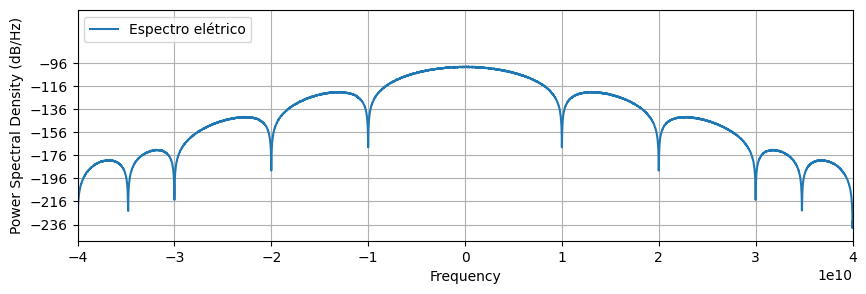

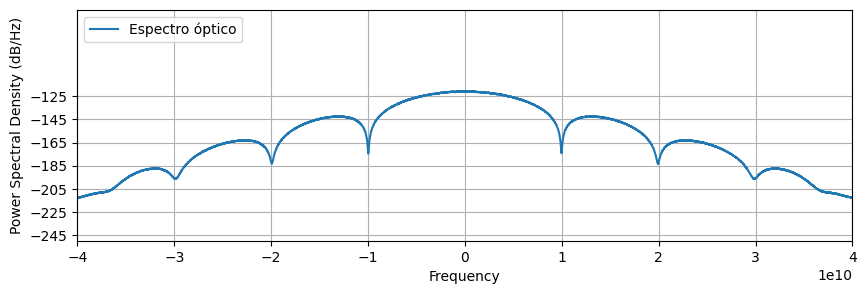

In [47]:
# parameters of the simulation
M = 16               # ordem da modulation
constType = 'qam'   # type de modulation
SpS = 16            # Amostras por símbolo
Rs  = 10e9          # Symbol rate
Ts  = 1/Rs          # Período de símbolo em segundos
Fa  = 1/(Ts/SpS)    # Frequency de amostragem do signal (amostras/second)
Ta  = 1/Fa          # Período de amostragem

# generate pseudo-random bit sequence
bitsTx = np.random.randint(2, size = int(80e4*np.log2(M)))

# generate ook modulated symbol sequence
symbTx = modulateGray(bitsTx, M, constType)
symbTx = symbTx/np.max(np.abs(symbTx.real)) # ajusta amplitudes do signal para variar entre -1 e 1

# upsampling
symbolsUp = upsample(symbTx, SpS)

# pulso NRZ típico
pulse = pulseShape('nrz', SpS)
pulse = pulse/max(abs(pulse))

# formatação de pulso
sigTx = firFilter(pulse, symbolsUp)

sigTx = sigTx/np.max(np.abs(sigTx.real)) # ajusta amplitudes do signal para variar entre -1 e 1

# plota psd
plt.figure();
plt.psd(sigTx,Fs=Fa, NFFT = 16*1024, sides='twosided', label = 'Espectro elétrico')
plt.legend(loc='upper left');
plt.xlim(-4*Rs,4*Rs);
plt.ylim(-250,-50);

# modulation optical
paramIQM = parameters()
paramIQM.Vpi = 2
paramIQM.Vb = -paramIQM.Vpi

P0 = 100e-3 # power da portadora CW na input no MZM
Ai = np.sqrt(P0)

sigTxo = iqm(Ai, 0.25*paramIQM.Vpi*sigTx, paramIQM)

# plota psd
plt.figure();
plt.psd(sigTxo, Fs=Fa, NFFT = 16*1024, sides='twosided', label = 'Espectro óptico')
plt.legend(loc='upper left');
plt.xlim(-4*Rs,4*Rs);
plt.ylim(-250,-50);

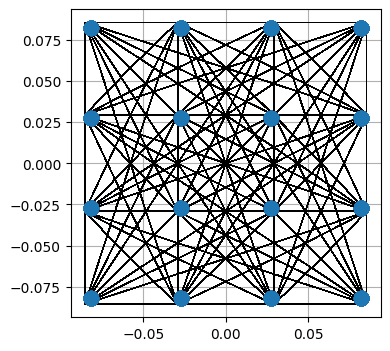

In [48]:
plt.figure(figsize=(4,4))
plt.plot(sigTxo.real,sigTxo.imag,'k--', linewidth=0.5)
plt.plot(np.sqrt(signal_power(sigTxo))*symbTx.real, np.sqrt(signal_power(sigTxo))*symbTx.imag,'o', markersize=10);
plt.grid()
plt.axis('equal');

# diagram de olho
#eyediagram(sigTxo, sigTxo.size-SpS, SpS, ptype='fast')
#eyediagram(np.abs(sigTxo)**2, sigTxo.size-SpS, SpS, ptype='fast')

## Formatação  de pulso optical: pulsos retorno-ao-zero (RZ)

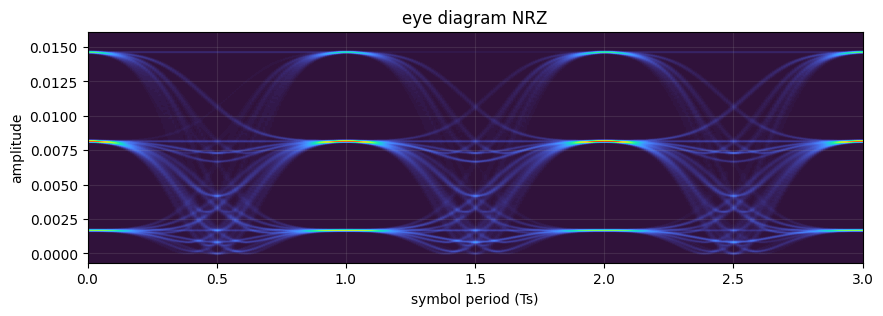

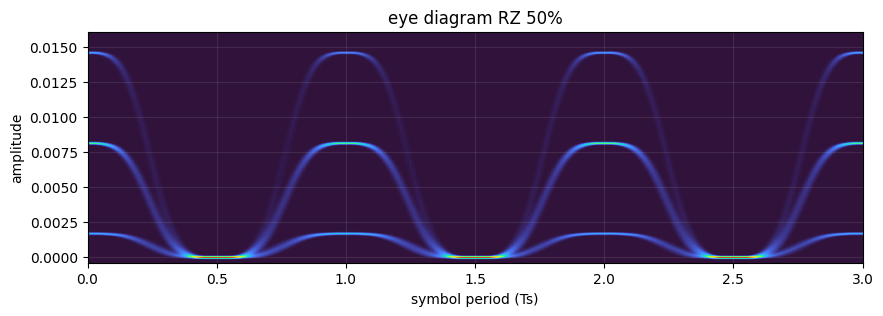

In [49]:
# Pulsos RZ 50%: Vb = Vπ/2, Vs = Vπ/2, fs = Rs,   ϕs = π
# Pulsos RZ 33%: Vb = 0,    Vs = Vπ,   fs = Rs/2, ϕs = π/2
# Pulsos RZ 67%: Vb = Vπ,   Vs = Vπ,   fs = Rs/2, ϕs = 0

SpS = 16         # Amostras por símbolo
Rs  = 10e9       # Symbol rate
Ts  = 1/Rs       # Período de símbolo em segundos
Fa  = SpS*Rs     # Frequency de amostragem do signal (amostras/second)
Ta  = 1/Fa       # Período de amostragem

t = np.arange(0, sigTxo.shape[0])*Ta

RZ = 50 # type de pulso RZ (33%, 50%, 67%)

# parameters of the MZM
paramMZM = parameters()
paramMZM.Vpi = 2

Ai = 1

# parameters of the formatador para cada type de pulso RZ
if RZ == 33:
    
    paramMZM.Vb = 0    
    # parameters of the signal senoidal
    fs = Rs/2
    Vs = paramMZM.Vpi
    ϕs = np.pi/2 
    
elif RZ == 50:
    
    paramMZM.Vb = paramMZM.Vpi/2    
    # parameters of the signal senoidal
    fs = Rs
    Vs = paramMZM.Vpi/2
    ϕs = np.pi
    
elif RZ == 67:
    
    Vb = paramMZM.Vpi    
    # parameters of the signal senoidal
    fs = Rs/2
    Vs = paramMZM.Vpi
    ϕs = 0  

    
# gera signal senoidal
senoideRF = Vs*np.cos(2*np.pi*fs*t + ϕs)

# MZM utilizado como formatador de pulso (pulse carver)
#sigTxo    = mzm(Ai, senoideRF, paramMZM)
sigTxo_  = mzm(sigTxo, senoideRF, paramMZM)

# diagrams de olho
eyediagram(np.abs(sigTxo)**2,sigTxo.size-SpS, SpS, plotlabel='NRZ', ptype='fancy')
#eyediagram(np.abs(mzm(Ai, senoideRF,  paramMZM))**2, sigTxo.size-SpS, SpS, plotlabel='pulsos RZ '+str(RZ)+'%', ptype='fast')
eyediagram(np.abs(sigTxo_)**2, sigTxo.size-SpS, SpS, plotlabel='RZ '+str(RZ)+'%', ptype='fancy')

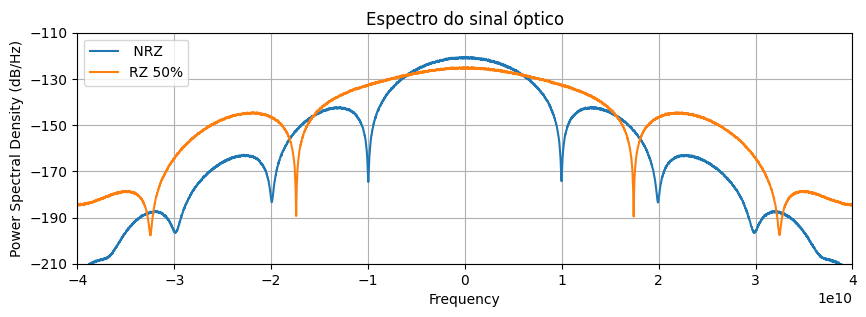

In [50]:
# plota psd
plt.figure();
plt.xlim(-4*Rs,4*Rs);
plt.ylim(-210,-110);
plt.title('Espectro do sinal óptico')
plt.psd(sigTxo,Fs=Fa, NFFT = 16*1024, sides='twosided', label = ' NRZ')
plt.psd(sigTxo_,Fs=Fa, NFFT = 16*1024, sides='twosided', label = 'RZ '+str(RZ)+'%')
plt.legend(loc='upper left');

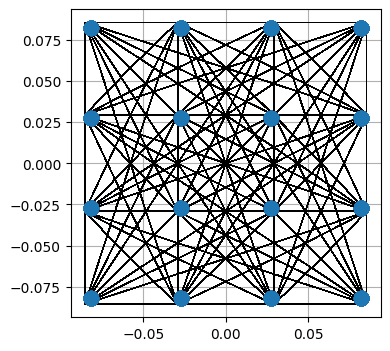

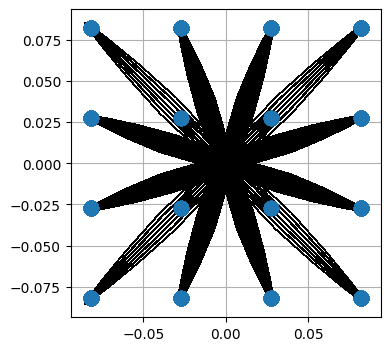

In [51]:
plt.figure(figsize=(4,4))
plt.plot(sigTxo.real,sigTxo.imag,'k--', linewidth=0.5)
plt.plot(np.sqrt(signal_power(sigTxo))*symbTx.real, np.sqrt(signal_power(sigTxo))*symbTx.imag,'o', markersize=10);
plt.grid()
plt.axis('equal');

plt.figure(figsize=(4,4))
plt.plot(sigTxo_.real,sigTxo_.imag,'k--', linewidth=0.5)
plt.plot(np.sqrt(signal_power(sigTxo))*symbTx.real, np.sqrt(signal_power(sigTxo))*symbTx.imag,'o', markersize=10);
plt.grid()
plt.axis('equal');

## Pente de frequencies (frequency comb)

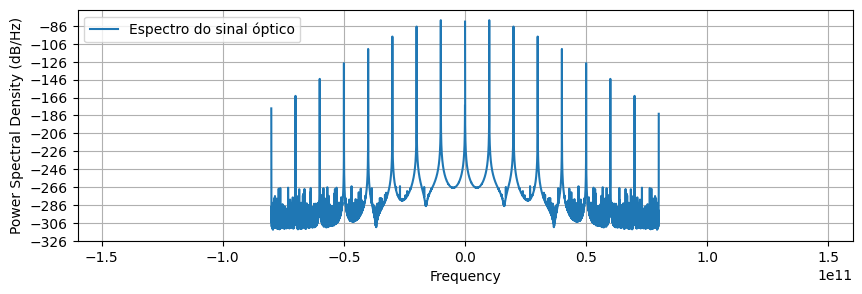

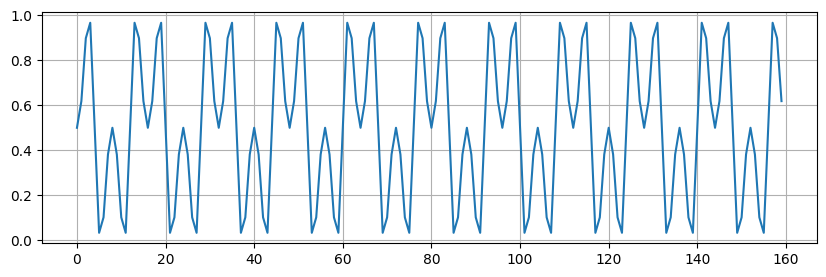

In [54]:
t = np.arange(0, sigTxo.size*8)*Ta

paramMZM = parameters()
paramMZM.Vpi = 2 
paramMZM.Vb = paramMZM.Vpi/2
Ai = 1

senoideRF = 2*Vπ/2*np.cos(2*np.pi*Rs*t + np.pi)

sigTxo_   = mzm(Ai, senoideRF, paramMZM)
#sigTxo_   = mzm(sigTxo_, Vπ, 5*senoideRF, Vb)

# plota psd
plt.figure();
plt.psd(sigTxo_,Fs=Fa, NFFT = 16*1024, sides='twosided', label = 'Espectro do sinal óptico')
plt.legend(loc='upper left');
plt.xlim(-16*Rs,16*Rs);
#plt.ylim(-200,-50);

plt.figure();
plt.plot(abs(sigTxo_[0:160])**2);
plt.grid()

## References

[1] G. P. Agrawal, Lightwave Technology: Telecommunication Systems. Wiley-Interscience, 2005.\
[2] J. G. Proakis, M. Salehi, Communication Systems Engineering, 2nd Edition, Pearson, 2002.